# Credit Risk Prediction for a Lending Company  
**Final Project – Data Scientist Internship (ID/X Partners × Rakamin)**

---

## 1. Project Background

As part of the final assignment of the Data Scientist internship program at **ID/X Partners**, in collaboration with **Rakamin**, this project simulates a real-world business case from a **lending company**.  

The company operates in the consumer lending sector and faces increasing challenges in managing **credit risk**, particularly in distinguishing between borrowers who are likely to **repay their loans** and those who may **default**. Ineffective credit risk assessment can lead to high default rates, financial losses, and inefficient capital allocation.

To address this issue, the company seeks a **data-driven credit risk prediction model** that can support better lending decisions and risk management strategies.

---

## 2. Business Problem

Lending companies must evaluate loan applications accurately to balance **profitability** and **risk exposure**. However, traditional rule-based or manual assessment methods often fail to capture complex patterns in borrower behavior.

The main business problems are:

- High risk of **loan default** due to inaccurate borrower assessment  
- Difficulty in identifying **high-risk applicants** early in the loan lifecycle  
- Lack of data-driven insights to support **credit approval decisions**  
- Inefficient risk segmentation that may lead to either:
  - Approving risky borrowers, or  
  - Rejecting potentially profitable customers

---

## 3. Company Goals

The lending company aims to:

- Minimize **credit losses** caused by bad loans  
- Improve **loan approval accuracy**  
- Enhance **risk-based decision making**  
- Develop a scalable and explainable **credit risk scoring system**  
- Support business teams (credit, risk, and management) with actionable insights

---

## 4. Project Objective

The primary objective of this project is to:

> **Build a machine learning model that predicts credit risk by classifying loans as “good” or “bad” based on historical loan data.**

Specifically, this project aims to:

- Perform **end-to-end data science workflow**, including:
  - Data understanding
  - Data cleaning and preprocessing
  - Feature engineering
  - Outlier handling
  - Model training and evaluation
- Develop and compare multiple **classification models**
- Identify the most suitable model based on business-relevant metrics
- Prepare **clear and communicative visualizations** to present insights and results to stakeholders

---

## 5. Dataset Overview

The dataset used in this project is:

- **File name:** `loan_data_2007_2014.csv`
- **Source:** Internal dataset provided as part of the internship program
- **Description:** Historical loan records from a lending company between 2007 and 2014

The dataset contains information related to:

- Borrower demographics and employment
- Loan characteristics (amount, term, interest rate)
- Credit history and behavior
- Loan performance and status

Each record represents a **loan application**, with the target variable indicating the loan outcome (e.g., fully paid, charged off, default).

---

## 6. Target Variable

The target variable is derived from the `loan_status` column and is transformed into a **binary classification label**:

- **0 → Good Loan** (e.g., fully paid)
- **1 → Bad Loan** (e.g., charged off, default)

This binary formulation aligns with the business goal of **credit risk prediction**, where identifying bad loans is critical for minimizing financial losses.

---

## 7. Scope & Methodology

This project follows a standard **Data Science methodology**, including:

1. Data Understanding & Exploratory Data Analysis (EDA)  
2. Data Cleaning & Missing Value Handling  
3. Feature Engineering & Encoding  
4. Outlier Handling (business-driven approach)  
5. Handling Imbalanced Data  
6. Model Training & Evaluation  
7. Model Comparison & Selection  
8. Insight Generation & Visualization

The solution is implemented using **Python**, leveraging common data science and machine learning libraries.

---

## 8. Expected Impact

By implementing this solution, the lending company is expected to:

- Reduce default-related financial losses  
- Improve decision consistency and transparency  
- Enable data-driven credit risk management  
- Gain deeper insights into borrower risk profiles  

---

## 9. Deliverables

The final deliverables of this project include:

- A trained and evaluated **credit risk prediction model**
- Supporting **visualizations and performance metrics**
- A clear, structured **Jupyter Notebook** documenting the end-to-end process
- Business-oriented insights that can be communicated to non-technical stakeholders

---

This project demonstrates the application of data science techniques to solve a real-world **credit risk problem**, bridging technical modeling with business objectives.


# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import copy
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix, classification_report

# Data Import

In [2]:
df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")
pd.set_option('display.max_columns', None)
df_raw.head()

C:\Users\prima\AppData\Local\Temp\ipykernel_14424\736023655.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Columns Description

| Column Name | Description |
|------------|-------------|
| acc_now_delinq | Number of accounts on which the borrower is currently delinquent |
| addr_state | State provided by the borrower in the loan application |
| annual_inc | Self-reported annual income of the borrower |
| application_type | Indicates whether the loan is individual or joint application |
| collection_recovery_fee | Post charge-off collection fee |
| collections_12_mths_ex_med | Number of collections in the last 12 months excluding medical collections |
| delinq_2yrs | Number of 30+ days delinquency incidents in the past 2 years |
| desc | Loan description provided by the borrower |
| dti | Debt-to-income ratio excluding mortgage and requested loan |
| earliest_cr_line | Month when the borrower's earliest credit line was opened |
| emp_length | Employment length in years (0–10, where 10 means 10+ years) |
| emp_title | Job title provided by the borrower |
| funded_amnt | Total amount funded for the loan |
| funded_amnt_inv | Total amount funded by investors |
| grade | Loan grade assigned by Lending Club |
| home_ownership | Home ownership status (RENT, OWN, MORTGAGE, OTHER) |
| id | Unique loan listing ID |
| initial_list_status | Initial listing status of the loan (W, F) |
| inq_last_6mths | Number of credit inquiries in the past 6 months |
| installment | Monthly payment owed by the borrower |
| int_rate | Interest rate on the loan |
| issue_d | Month when the loan was issued |
| last_credit_pull_d | Most recent month credit was pulled |
| last_pymnt_amnt | Last payment amount received |
| last_pymnt_d | Month when the last payment was received |
| loan_amnt | Loan amount applied for by the borrower |
| loan_status | Current status of the loan (target variable) |
| member_id | Unique borrower ID |
| mths_since_last_delinq | Months since last delinquency |
| mths_since_last_major_derog | Months since most recent major derogatory event (90+ days late) |
| mths_since_last_record | Months since last public record |
| next_pymnt_d | Next scheduled payment date |
| open_acc | Number of open credit accounts |
| out_prncp | Remaining outstanding principal |
| out_prncp_inv | Remaining outstanding principal funded by investors |
| policy_code | Policy code (1 = publicly available, 2 = not publicly available) |
| pub_rec | Number of derogatory public records |
| purpose | Purpose of the loan |
| pymnt_plan | Indicates whether a payment plan is in place |
| recoveries | Post charge-off gross recovery |
| revol_bal | Total revolving credit balance |
| revol_util | Revolving credit utilization rate |
| sub_grade | Loan sub-grade assigned by Lending Club |
| term | Loan term in months (36 or 60) |
| title | Loan title provided by the borrower |
| tot_coll_amt | Total collection amounts ever owed |
| tot_cur_bal | Total current balance of all credit accounts |
| total_acc | Total number of credit accounts |
| total_pymnt | Total payments received to date |
| total_pymnt_inv | Total payments received by investors |
| total_rec_int | Total interest received |
| total_rec_late_fee | Total late fees received |
| total_rec_prncp | Total principal received |
| total_rev_hi_lim | Total revolving credit limit |
| url | URL of the loan listing page |
| verification_status | Income verification status |
| zip_code | First three digits of borrower’s ZIP code |


# Initial EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df_raw.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\prima\AppData\Local\Temp\ipykernel_14424\2983377754.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_raw, x='loan_status', order=order, palette=colors)


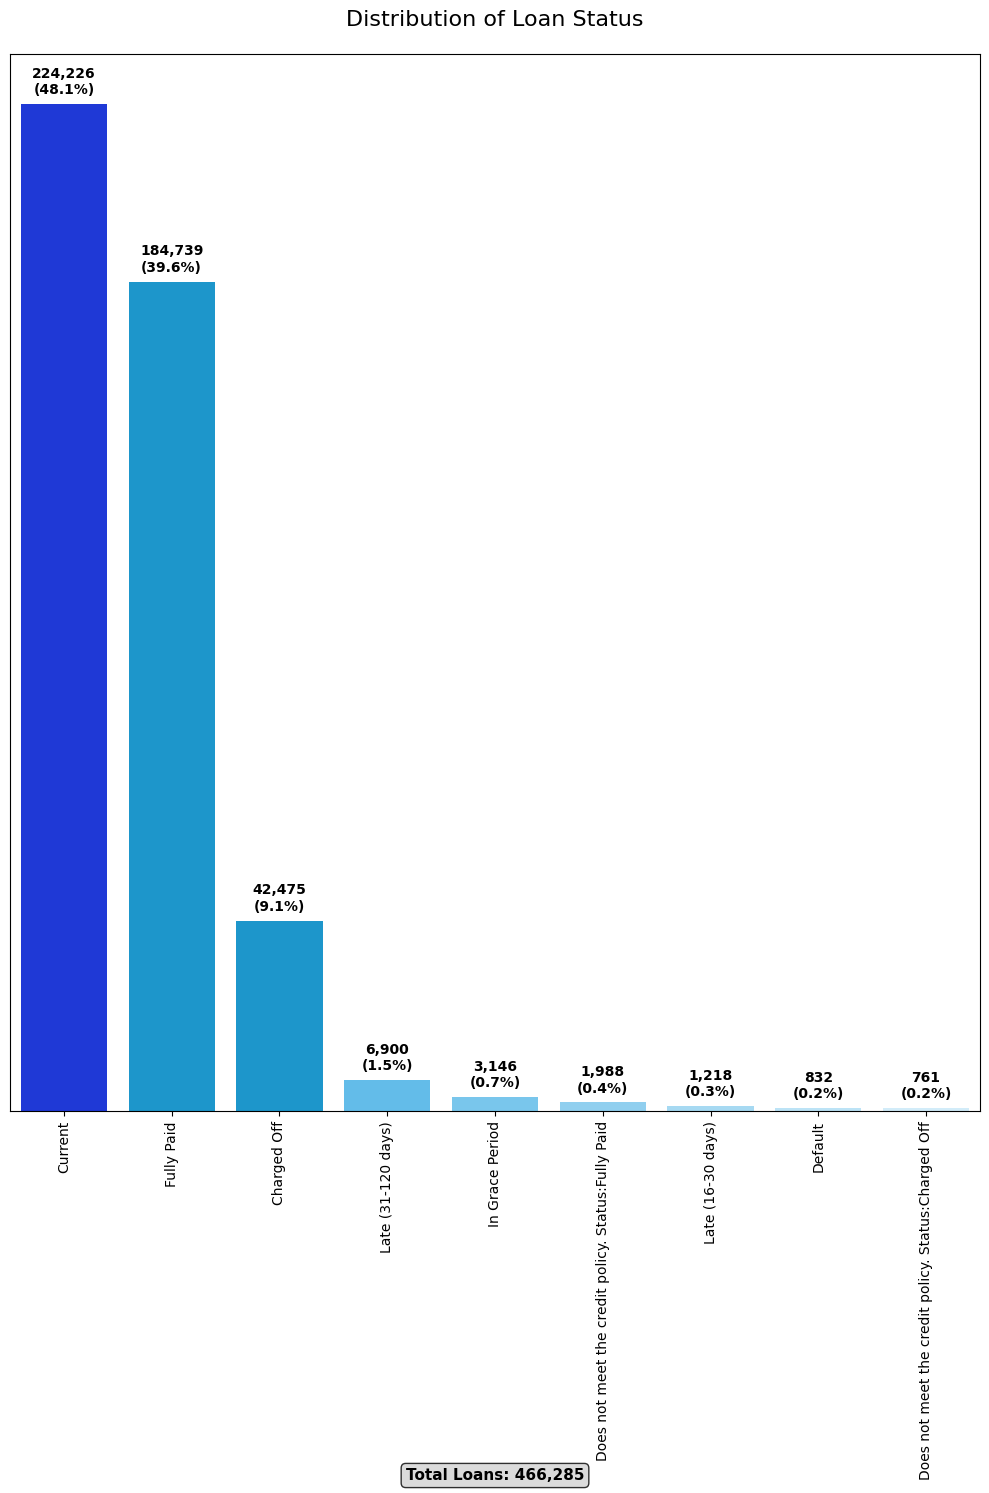

In [5]:
order = df_raw['loan_status'].value_counts().index

total_count = len(df_raw)

loan_status_counts = df_raw['loan_status'].value_counts().loc[order]
percentages = (loan_status_counts.values / total_count * 100)

colors = []
color_palette = {
    1: '#0023F5',    
    2: '#00A2E8',    
    3: '#00A2E8',    
    4: '#4DC3FF',    
    5: '#66CCFF',    
    6: '#80D4FF',    
    7: '#99DDFF',    
    8: '#B3E6FF',    
    9: '#CCEEFF',    
    10: '#E6F7FF'    
}

for i in range(len(order)):
    rank = i + 1
    if rank in color_palette:
        colors.append(color_palette[rank])
    else:
        colors.append('#E6F7FF')

plt.figure(figsize=(10, 15))
ax = sns.countplot(data=df_raw, x='loan_status', order=order, palette=colors)

plt.xticks(rotation=90)

ax.set(xlabel='', ylabel='')

ax.yaxis.set_visible(False)

plt.title('Distribution of Loan Status', fontsize=16, pad=20)

for i, p in enumerate(ax.patches):
    count = p.get_height()
    pct = percentages[i] if i < len(percentages) else 0
    
    ax.annotate(f'{count:,.0f}\n({pct:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

total_text = f'Total Loans: {total_count:,}'
plt.figtext(0.5, 0.01, total_text, 
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.show()

# Data Cleaning & Preprocessing

## Feature Selection

### Drop Columns with Null Values for All Records

In [6]:
df_raw.dropna(axis = 1, how = "all", inplace = True)

### Drop Unnecessary Columns

In [7]:
drop_cols = [
    # Identifier
    "Unnamed: 0",
    "id",
    "member_id",
    "url",

    # Free text (unstable & noisy)
    "emp_title",
    "desc",
    "title",

    # Post-loan / payment leakage
    "funded_amnt",
    "funded_amnt_inv",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "next_pymnt_d",

    # Credit pulled after approval
    "last_credit_pull_d",

    # Redundant or not predictive
    "policy_code",
    "grade",
    "zip_code",
    "initial_list_status",

    # Single value
    "application_type"
]

In [8]:
df_raw.drop(columns = drop_cols, inplace = True)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   installment                  466285 non-null  float64
 4   sub_grade                    466285 non-null  object 
 5   emp_length                   445277 non-null  object 
 6   home_ownership               466285 non-null  object 
 7   annual_inc                   466281 non-null  float64
 8   verification_status          466285 non-null  object 
 9   issue_d                      466285 non-null  object 
 10  loan_status                  466285 non-null  object 
 11  pymnt_plan                   466285 non-null  object 
 12  purpose                      466285 non-null  object 
 13 

### Drop Columns with High Correlation

In [10]:
continuous_cols = df_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(df_raw[continuous_cols],0.90)
corr_features

{'installment'}

In [13]:
df_raw.drop(columns=list(corr_features), inplace = True)

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   445277 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   issue_d                      466285 non-null  object 
 9   loan_status                  466285 non-null  object 
 10  pymnt_plan                   466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  addr_state                   466285 non-null  object 
 13 

### Drop Columns with Very Imbalanced Categories or Only One Category

In [15]:
for col in df_raw.select_dtypes(include='object').columns.tolist():
    print("Distribution of unique values ​​for features", col)
    print(df_raw[col].value_counts(normalize=True) * 100)
    print('\n')

Distribution of unique values ​​for features term
term
36 months    72.477776
60 months    27.522224
Name: proportion, dtype: float64


Distribution of unique values ​​for features sub_grade
sub_grade
B3    6.795415
B4    6.542136
C1    5.780370
C2    5.734690
B2    5.706810
C3    5.429512
B5    5.415572
C4    5.169585
B1    4.906012
C5    4.756319
A5    4.666030
D1    4.130735
A4    4.084412
D2    3.655704
D3    3.198902
D4    3.023687
A3    2.695347
D5    2.480457
A2    2.349636
A1    2.260635
E1    1.937227
E2    1.859163
E3    1.496081
E4    1.285051
E5    1.090964
F1    0.844977
F2    0.643598
F3    0.580761
F4    0.443291
F5    0.324480
G1    0.237837
G2    0.176501
G3    0.125031
G4    0.090503
G5    0.082568
Name: proportion, dtype: float64


Distribution of unique values ​​for features emp_length
emp_length
10+ years    33.697900
2 years       9.291520
3 years       8.218704
< 1 year      8.144369
5 years       6.911204
1 year        6.652488
4 years       6.293386
7 years    

In [16]:
df_raw.drop(columns = 'pymnt_plan', inplace=True)

In [17]:
df_raw.sample(10)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
243531,4000,36 months,12.99,C2,< 1 year,OWN,44000.0,Not Verified,Nov-14,Current,debt_consolidation,TN,5.46,0.0,Aug-11,0.0,NaN,NaN,15.0,0.0,2541,22.7,15.0,0.0,NaN,0.0,0.0,22803.0,11200.0
53476,3500,36 months,11.99,B3,6 years,MORTGAGE,50000.0,Not Verified,Dec-13,Fully Paid,debt_consolidation,MI,22.20,0.0,Mar-97,1.0,62.0,NaN,14.0,0.0,6248,27.3,42.0,0.0,62.0,0.0,0.0,178542.0,22900.0
457021,18000,60 months,22.90,E4,10+ years,MORTGAGE,96000.0,Verified,Jan-14,Current,debt_consolidation,CA,10.74,0.0,Oct-97,0.0,28.0,24.0,9.0,1.0,8670,94.2,26.0,0.0,28.0,0.0,0.0,375034.0,9200.0
80080,21000,36 months,9.25,A5,7 years,RENT,129000.0,Verified,Oct-13,Fully Paid,credit_card,CA,13.98,0.0,Dec-91,0.0,NaN,NaN,6.0,0.0,30682,69.1,21.0,0.0,NaN,0.0,0.0,45126.0,44380.0
239195,11625,36 months,16.49,D3,< 1 year,RENT,36000.0,Source Verified,Dec-14,Current,moving,CA,16.20,0.0,Feb-08,2.0,NaN,NaN,12.0,0.0,7522,14.7,13.0,0.0,NaN,0.0,0.0,14327.0,51300.0
429975,20000,36 months,12.99,B5,10+ years,MORTGAGE,59013.0,Source Verified,Mar-14,Current,credit_card,OH,12.81,0.0,Oct-94,1.0,NaN,NaN,7.0,0.0,15558,94.3,12.0,0.0,NaN,0.0,0.0,134354.0,16500.0
448197,11700,60 months,18.25,D3,1 year,RENT,41600.0,Verified,Feb-14,Fully Paid,credit_card,CA,27.84,1.0,Nov-01,1.0,17.0,NaN,16.0,0.0,6978,46.8,37.0,0.0,72.0,0.0,9119.0,52184.0,14900.0
436470,10400,60 months,16.59,D1,NaN,OWN,42000.0,Source Verified,Feb-14,Charged Off,debt_consolidation,NY,17.66,0.0,Jan-98,0.0,NaN,NaN,8.0,0.0,7414,71.3,10.0,0.0,NaN,0.0,0.0,22017.0,10400.0
446988,10400,36 months,8.90,A5,8 years,MORTGAGE,56000.0,Source Verified,Feb-14,In Grace Period,credit_card,TN,26.79,0.0,Aug-00,0.0,NaN,NaN,18.0,0.0,21515,22.2,29.0,0.0,NaN,0.0,0.0,167719.0,96700.0
233127,9600,36 months,6.49,A2,5 years,MORTGAGE,99000.0,Not Verified,Dec-14,Fully Paid,credit_card,TX,15.47,0.0,Feb-98,2.0,83.0,NaN,5.0,0.0,6373,85.0,24.0,0.0,83.0,0.0,0.0,170427.0,7500.0


## Fixing Data Type

### Change Date Column by Parsing

In [18]:
def date_parse(val):
    if pd.isna(val):
        return pd.NaT
    
    month_str, year_str = val.split("-")
    year = int(year_str)
    
    if year >= 30:
        year += 1900
    else:
        year += 2000
    
    return pd.to_datetime(f"{year}-{month_str}-01", format="%Y-%b-%d")


In [19]:
df_raw["earliest_cr_line"] = df_raw["earliest_cr_line"].apply(date_parse)

In [20]:
df_raw["issue_d"] = df_raw["issue_d"].apply(date_parse)

In [21]:
# Check to make sure no date in which loan was issued is earlier than earliest credit line issued
(df_raw["earliest_cr_line"] > df_raw["issue_d"]).sum()

np.int64(0)

In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

### Change float-typed Columns without Numbers After Comma to Integer

In [23]:
for col in df_raw.columns:
    if df_raw[col].dtype == "float64":
        s = df_raw[col]
        is_integer_like = np.all(np.isclose(s.dropna() % 1, 0))
        if is_integer_like:
            df_raw[col] = s.astype("Int64")

### Change int64 Columns to Int64 (for accepting null values)

In [24]:
int_cols = df_raw.select_dtypes(include='int64').columns
df_raw[int_cols] = df_raw[int_cols].astype('Int64')

In [25]:
# Copy data to save progress because parsing step taking a lot of time
df = copy.deepcopy(df_raw)
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,<NA>,<NA>,3,0,13648,83.7,9,0,<NA>,0,<NA>,<NA>,<NA>
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,<NA>,<NA>,3,0,1687,9.4,4,0,<NA>,0,<NA>,<NA>,<NA>
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,<NA>,<NA>,2,0,2956,98.5,10,0,<NA>,0,<NA>,<NA>,<NA>
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,35,<NA>,10,0,5598,21.0,37,0,<NA>,0,<NA>,<NA>,<NA>
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,38,<NA>,15,0,27783,53.9,38,0,<NA>,0,<NA>,<NA>,<NA>


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

## Feature Engineering

### Create `credit_history_months`

In [27]:
df["credit_history_months"] = (
    (df["issue_d"] - df["earliest_cr_line"]).dt.days / 30
)

In [28]:

df.loc[df["issue_d"]<df["earliest_cr_line"], ["issue_d", "earliest_cr_line"]].shape[0]

0

In [29]:
df.drop(columns = ["earliest_cr_line"], inplace = True) 
# issue_d also needed to drop for ML training, but we don't drop now as we need for EDA

In [30]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,<NA>,<NA>,3,0,13648,83.7,9,0,<NA>,0,<NA>,<NA>,<NA>,327.666667
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,<NA>,<NA>,3,0,1687,9.4,4,0,<NA>,0,<NA>,<NA>,<NA>,154.233333
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,<NA>,<NA>,2,0,2956,98.5,10,0,<NA>,0,<NA>,<NA>,<NA>,122.733333
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,35,<NA>,10,0,5598,21.0,37,0,<NA>,0,<NA>,<NA>,<NA>,192.733333
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,0,38,<NA>,15,0,27783,53.9,38,0,<NA>,0,<NA>,<NA>,<NA>,193.766667


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

### `Region` Mapping

In [32]:
West = ['CA', 'NV', 'UT', 'CO', 'WY', 'MT', 'ID', 'OR', 'WA', 'AK', 'HI']
Southwest = ['AZ', 'NM', 'TX', 'OK']
Midwest = ['ND', 'MN', 'SD', 'NE', 'KS', 'MO', 'IA', 'WI', 'IL', 'IN', 'OH', 'MI']
Southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'TN', 'KY', 'NC', 'SC', 'WV', 'DC', 'VA', 'DE', 'FL']
Northeast = ['PA', 'MD', 'NJ', 'NY', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']

def map_state_to_region(state):
    if state in West:
        return 'West'
    elif state in Southwest:
        return 'Southwest'
    elif state in Midwest:
        return 'Midwest'
    elif state in Southeast:
        return 'Southeast'
    elif state in Northeast:
        return 'Northeast'
    else:
        return 'Other' 

df["region"] = df['addr_state'].apply(map_state_to_region)

In [33]:
df.duplicated().sum()

np.int64(0)

### Create `years` for Yearly Trend Analysis

In [34]:
df["years"] = df["issue_d"].dt.year

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

## Handling Missing Values

### Check missing values

In [36]:
df.isnull().mean().sort_values(ascending=False)

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
mths_since_last_delinq         0.536906
tot_coll_amt                   0.150715
total_rev_hi_lim               0.150715
tot_cur_bal                    0.150715
emp_length                     0.045054
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
inq_last_6mths                 0.000062
delinq_2yrs                    0.000062
pub_rec                        0.000062
open_acc                       0.000062
total_acc                      0.000062
acc_now_delinq                 0.000062
credit_history_months          0.000062
annual_inc                     0.000009
loan_status                    0.000000
dti                            0.000000
addr_state                     0.000000
verification_status            0.000000
sub_grade                      0.000000
home_ownership                 0.000000
loan_amnt                      0.000000
int_rate                       0.000000


In [37]:
cols = [
    "mths_since_last_record",
    "mths_since_last_major_derog",
    "mths_since_last_delinq"
]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(0)

In [38]:
cols = ["total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(df[col].median())

In [39]:
# 1. Copy kolom
df["emp_length_num"] = df["emp_length"]

# 2. Cleaning text → numeric
df["emp_length_num"] = (
    df["emp_length_num"]
    .str.replace("10+ years", "10", regex=False)
    .str.replace("< 1 year", "0", regex=False)
    .str.replace(" years", "", regex=False)
    .str.replace(" year", "", regex=False)
    .astype(float)
)

# 3. Missing indicator
df["emp_length_missing"] = df["emp_length_num"].isna().astype("Int64")

# 4. Median imputasi
df["emp_length_num"] = df["emp_length_num"].fillna(
    df["emp_length_num"].median()
)

# 5. Drop old column
df = df.drop(columns=["emp_length"])

In [40]:
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["annual_inc"] = df["annual_inc"].fillna(df["annual_inc"].median())

In [41]:
cols = [
    "collections_12_mths_ex_med", "delinq_2yrs", "open_acc",
    "pub_rec", "total_acc", "inq_last_6mths",
    "acc_now_delinq", "credit_history_months"
]

df[cols] = df[cols].fillna(0)

## Handling Missing Values – Rationale and Interpretation

This section explains **why different imputation strategies are applied to different features**, rather than using a single blanket approach.  
The decisions below are driven by **domain meaning**, **distribution of missingness**, and **model interpretability**.

---

### 1️⃣ `mths_since_last_record`, `mths_since_last_major_derog`, `mths_since_last_delinq`

```python
cols = [
    "mths_since_last_record",
    "mths_since_last_major_derog",
    "mths_since_last_delinq"
]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(0)
````

**Why this approach?**

* These variables represent **“time since last negative credit event”**.

* A missing value does **not** mean the value is unknown; in credit datasets, it usually means:

  > **The borrower has never experienced such an event.**

* Therefore:

  * `NaN` is **informative**
  * Filling with `0` encodes *“no prior event”*

**Why add a missing indicator?**

* Although `0` is semantically meaningful, the *fact that the value was originally missing* may itself carry signal.
* The `_missing` flag allows the model to learn:

  * Difference between *“explicitly 0”* vs *“never occurred”*

**Interpretation**

* `0` → No historical derogatory event
* Large values → Event occurred long ago
* `_missing = 1` → Absence of event history (clean credit)

---

### 2️⃣ `total_rev_hi_lim`, `tot_cur_bal`, `tot_coll_amt`

```python
cols = ["total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(df[col].median())
```

**Why median imputation?**

* These are **continuous monetary variables**
* Missingness here does **not** imply zero:

  * Zero would be misleading (e.g., “no credit limit”)
* Distributions are typically:

  * Right-skewed
  * Contain extreme values

➡️ **Median** is chosen because:

* Robust to outliers
* Preserves central tendency

**Why add a missing indicator?**

* Missing financial information may correlate with:

  * Thin credit files
  * Data reporting issues
* The indicator allows the model to capture this latent signal.

**Interpretation**

* Median-filled value → Typical borrower profile
* `_missing = 1` → Financial data not reported or unavailable

---

### 3️⃣ `emp_length`

```python
df["emp_length_num"] = df["emp_length"]

df["emp_length_num"] = (
    df["emp_length_num"]
    .str.replace("10+ years", "10", regex=False)
    .str.replace("< 1 year", "0", regex=False)
    .str.replace(" years", "", regex=False)
    .str.replace(" year", "", regex=False)
    .astype(float)
)

df["emp_length_missing"] = df["emp_length_num"].isna().astype("Int64")
df["emp_length_num"] = df["emp_length_num"].fillna(
    df["emp_length_num"].median()
)

df = df.drop(columns=["emp_length"])
```

**Why convert to numeric?**

* Employment length is **ordinal**, not nominal.
* Longer employment → more stability → lower default risk.
* Numeric representation preserves this ordering.

**Why median imputation?**

* Missing employment length does not imply:

  * Unemployed
  * Zero experience
* Median represents a neutral assumption.

**Why missing indicator?**

* Missing employment history can signal:

  * Informal employment
  * Incomplete records
* This information should not be discarded.

**Interpretation**

* Higher value → more employment stability
* `_missing = 1` → Employment history unavailable

---

### 4️⃣ `revol_util`, `annual_inc`

```python
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["annual_inc"] = df["annual_inc"].fillna(df["annual_inc"].median())
```

**Why no missing indicator here?**

* Missing rate is extremely low (< 0.1%)
* Adding indicators would:

  * Introduce noise
  * Increase dimensionality with negligible gain

**Why median?**

* Both variables are:

  * Skewed
  * Sensitive to outliers

Median imputation preserves robustness while keeping the pipeline simple.

---

### 5️⃣ Count-based credit variables

```python
cols = [
    "collections_12_mths_ex_med", "delinq_2yrs", "open_acc",
    "pub_rec", "total_acc", "inq_last_6mths",
    "acc_now_delinq", "credit_history_months"
]

df[cols] = df[cols].fillna(0)
```

**Why fill with zero?**

* These are **count-based variables**

* Missing values almost always mean:

  > **No such event occurred or count is zero**

* Zero is a **valid and meaningful value**

**Why no missing indicator?**

* Missingness is extremely rare
* Zero already fully captures the semantic meaning

**Interpretation**

* `0` → No recent activity or adverse events
* Higher values → Increased credit risk

---

## Target Mapping

In [42]:
df_raw["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [43]:
loan_status_mapping = {
    # GOOD
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,

    # BAD
    "Charged Off": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
}

## Target Variable Engineering – `loan_status` Mapping Rationale

This section explains **why only specific loan statuses are mapped to binary labels (0 and 1)**, and **why the remaining categories are intentionally excluded** from the modeling dataset.

---

### 🎯 Objective of Target Encoding

The goal of this project is to build a **binary classification model** for **loan default risk**:

- `0` → **Good loan** (no financial loss)
- `1` → **Bad loan** (financial loss / default)

Therefore, each original loan status must be evaluated based on **actual realized credit risk**, not temporary or ambiguous states.

---

### 📌 Original `loan_status` Categories

```text
'Fully Paid'
'Charged Off'
'Current'
'Default'
'Late (31-120 days)'
'In Grace Period'
'Late (16-30 days)'
'Does not meet the credit policy. Status:Fully Paid'
'Does not meet the credit policy. Status:Charged Off'
````

These statuses can be grouped conceptually into:

1. **Resolved outcomes**
2. **Unresolved / transitional states**

---

## 1️⃣ GOOD Loans → Label `0`

```python
"Fully Paid": 0,
"Does not meet the credit policy. Status:Fully Paid": 0,
```

### Why are these labeled as GOOD?

* **Fully Paid**

  * The borrower repaid the loan in full
  * No credit loss occurred
  * This is the clearest definition of a *good loan*

* **Does not meet the credit policy. Status:Fully Paid**

  * Although the loan did not meet LendingClub’s credit policy,
  * It was **still fully repaid**
  * From a risk outcome perspective, it behaved exactly like a good loan

📌 **Key principle**

> *Loan performance matters more than underwriting rules.*

---

## 2️⃣ BAD Loans → Label `1`

```python
"Charged Off": 1,
"Default": 1,
"Does not meet the credit policy. Status:Charged Off": 1,
```

### Why are these labeled as BAD?

* **Charged Off**

  * The lender has written off the loan as a loss
  * Principal was not fully recovered
  * This represents a realized financial loss

* **Default**

  * Borrower failed to meet repayment obligations
  * Strong indicator of credit failure
  * High financial and operational risk

* **Does not meet the credit policy. Status:Charged Off**

  * Loan failed both:

    * Credit policy requirements
    * Repayment obligations
  * Clearly belongs to the bad loan category

📌 **Key principle**

> *Any loan that results in a financial loss or default behavior must be treated as a bad outcome.*

---

## 3️⃣ Why Other Categories Are EXCLUDED (Dropped)

The following statuses are **intentionally not mapped**:

```text
'Current'
'In Grace Period'
'Late (16-30 days)'
'Late (31-120 days)'
```

### Why are these dropped?

These statuses represent **ongoing or transitional states**, not final outcomes.

#### Examples:

* **Current**

  * Loan is still active
  * Final outcome (good or bad) is unknown

* **In Grace Period**

  * Temporary delay
  * Borrower may still fully repay

* **Late (16–30 days), Late (31–120 days)**

  * Indicates delinquency
  * But not all late loans end in default
  * Many recover and become fully paid

📌 Including these would introduce:

* **Label noise**
* **Outcome leakage**
* **Ambiguous supervision signal**

> The model would be trained on labels that do not reflect final credit risk.

---

## 4️⃣ Why Not Map Late Loans as BAD?

Although late payments are risky, labeling them as BAD would be **conceptually incorrect** because:

* The loan has **not yet defaulted**
* The final status is unknown at the observation cutoff
* This would bias the model toward short-term delinquency rather than true default

📌 In credit modeling:

> **Target labels must reflect final realized outcomes, not intermediate signals.**

Late status should instead be used as:

* An **input feature**, not a target label

---

## 5️⃣ Final Mapping Logic (Summary)

```python
loan_status_mapping = {
    # GOOD (no financial loss)
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,

    # BAD (financial loss / default)
    "Charged Off": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
}
```

After mapping:

* Rows with unmapped statuses are **dropped**
* The resulting dataset contains only:

  * Clear good outcomes
  * Clear bad outcomes

In [44]:
df["status_bad"] = df["loan_status"].map(loan_status_mapping)
df = df.dropna(subset=["status_bad"])
df["status_bad"] = df["status_bad"].astype("Int64")
df = df.drop(columns=["loan_status"])
df["status_bad"].value_counts(normalize=True)

status_bad
0    0.80906
1    0.19094
Name: proportion, dtype: Float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   purpose                              230795 non-null  object        
 9   addr_state                           230795 non-null  object        
 10  d

## Outlier Detection & Handling

### Outlier Detection

In [46]:
# Create function to check outlier by using interquartile range
def check_outlier_iqr(series, factor=1.5):

    s = series.dropna()

    if s.empty or s.nunique() <= 1:
        return {
            "has_outlier": False,
            "n_outliers": 0,
            "lower_bound": np.nan,
            "upper_bound": np.nan
        }

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    n_outliers = ((s < lower_bound) | (s > upper_bound)).sum()

    return {
        "has_outlier": n_outliers > 0,
        "n_outliers": int(n_outliers),
        "lower_bound": float(lower_bound),
        "upper_bound": float(upper_bound)
    }

In [47]:
numeric_cols = df.select_dtypes(include=["Int64", "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'credit_history_months', 'mths_since_last_record_missing',
       'mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing',
       'total_rev_hi_lim_missing', 'tot_cur_bal_missing',
       'tot_coll_amt_missing', 'emp_length_num', 'emp_length_missing',
       'status_bad'],
      dtype='object')

In [48]:
outlier_report = {}

for col in numeric_cols:
    outlier_report[col] = check_outlier_iqr(df[col])

In [49]:
outlier_df = (
    pd.DataFrame(outlier_report)
    .T
    .sort_values("has_outlier", ascending=False)
)

outlier_df


,has_outlier,n_outliers,lower_bound,upper_bound
loan_amnt,True,6944,-9000.0,34200.0
total_acc,True,3263,-8.0,56.0
emp_length_missing,True,8755,0.0,0.0
mths_since_last_major_derog_missing,True,40232,1.0,1.0
mths_since_last_record_missing,True,27646,1.0,1.0
credit_history_months,True,7730,-22.183333,375.283333
total_rev_hi_lim,True,23029,-2700.0,48500.0
tot_cur_bal,True,16261,-132876.5,329151.5
tot_coll_amt,True,18167,0.0,0.0
acc_now_delinq,True,599,0.0,0.0


In [50]:
cols_with_outliers = outlier_df[outlier_df["has_outlier"]].index.tolist()
cols_with_outliers

['loan_amnt',
 'total_acc',
 'emp_length_missing',
 'mths_since_last_major_derog_missing',
 'mths_since_last_record_missing',
 'credit_history_months',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'acc_now_delinq',
 'int_rate',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'revol_util',
 'revol_bal',
 'pub_rec',
 'open_acc',
 'mths_since_last_record',
 'mths_since_last_delinq',
 'inq_last_6mths',
 'delinq_2yrs',
 'dti',
 'annual_inc',
 'status_bad']

In [51]:
cols_without_outliers = outlier_df[~outlier_df["has_outlier"]].index.tolist()
cols_without_outliers

['mths_since_last_delinq_missing',
 'total_rev_hi_lim_missing',
 'tot_cur_bal_missing',
 'tot_coll_amt_missing',
 'emp_length_num']

### Outlier Handling

## Outlier Handling Strategy – Conceptual Rationale & Design Logic

This section explains **why only specific columns are selected for outlier handling**, **why others are intentionally excluded**, and **the thinking framework that leads to the applied treatment rules**—without repeating the implementation code.

---

## 🎯 Core Objective

Outlier handling in this project is **not about blindly removing extreme values**, but about:

- Preserving **real credit risk signals**
- Preventing **model instability**
- Maintaining **interpretability**
- Avoiding **information leakage**

The approach follows a **business-aware, feature-type–driven strategy**, not a one-size-fits-all statistical rule.

---

## 1️⃣ Why NOT All Outlier-Detected Columns Are Treated

Initial detection flags many columns as having extreme values.  
However, **outlier detection ≠ outlier treatment**.

Only features that satisfy **all three conditions** are handled:

1. Continuous or quasi-continuous
2. High magnitude variation that can distort learning
3. Values that exceed realistic or meaningful business ranges

Columns failing these conditions are **left untouched**.

---

## 2️⃣ Column Groups & Treatment Philosophy

### A. Time-Since Event Features (Handled Separately)

**Selected features**
- Months since last delinquency
- Months since last public record
- Months since last major derogatory event

#### Why these features are special
- They represent **elapsed time**, not quantity
- Large values do **not linearly increase risk**
- Risk effect **saturates** after a certain duration

#### Conceptual decision
- A delinquency 5 years ago is **not materially different** from one 10 years ago
- Treating large values as numerically “bigger risk” is misleading

#### Applied logic
- Cap values at a **fixed horizon**
- Add a **binary indicator** to preserve the information that the value exceeded the cap

📌 This transforms:
> *“How long ago?”*  
into  
> *“Recent vs not recent”*

---

### B. Financial Magnitude Variables (Handled)

**Selected features**
- Loan amount
- Annual income
- Revolving balance
- Total current balance
- Credit limit–related totals
- Total collections amount

#### Why these are handled
- Extremely right-skewed
- Contain legitimate but **rare extreme values**
- Can dominate loss functions and decision boundaries

#### Conceptual decision
- Do **not remove** high values
- Do **not hardcode arbitrary limits**
- Use **distribution-aware capping**

#### Applied logic
- Identify extreme tails via robust quantiles
- Cap only the extremes
- Preserve relative ordering among normal values

📌 Goal:
> Reduce numerical dominance without erasing wealth-related signals

---

### C. Ratio & Percentage Features (Handled)

**Selected features**
- Interest rate
- Debt-to-income (DTI)
- Revolving utilization

#### Why these are handled
- Have **natural upper bounds**
- Values beyond those bounds are:
  - Measurement noise
  - Data artifacts
  - Extremely rare pathological cases

#### Conceptual decision
- Ratios beyond logical limits do not convey additional meaning
- A utilization of 300% is not “3× worse” than 100%

#### Applied logic
- Enforce realistic boundaries
- Maintain monotonic risk behavior
- Avoid exploding gradients in linear models

---

### D. Heavily Skewed Continuous Features (Handled)

Some monetary features show:
- Extreme right skew
- Many small values, few massive ones

#### Conceptual decision
- Linear models assume smooth value-response relationships
- Logarithmic scaling better reflects **economic perception of risk**

📌 Example intuition:
> Difference between 1M → 2M matters less than 10k → 20k

#### Applied logic
- Compress scale
- Preserve rank order
- Improve model stability

---

## 3️⃣ Why Other Detected Columns Are NOT Treated

### A. Count-Based Discrete Variables (Not Handled)

Examples:
- Number of delinquencies
- Public records
- Credit inquiries
- Open accounts

#### Reason
- Low integer range
- Each increment has **explicit semantic meaning**
- Extreme values are often **legitimate risk indicators**

📌 Treating them as outliers would:
- Destroy interpretability
- Remove genuine risk signals

---

### B. Missing Indicators & Binary Flags (Not Handled)

Examples:
- `_missing` columns
- Target variable
- Encoded categorical flags

#### Reason
- Binary by design
- No concept of magnitude
- Outlier treatment is meaningless

---

### C. Engineered Duration or Aggregated Indicators (Not Handled)

Examples:
- Credit history length
- Composite indicators

#### Reason
- Already normalized by construction
- Extremes often represent **strong credit maturity signals**

---

## 4️⃣ Why Indicators Are Added Instead of Dropping Data

Outlier treatment follows a **dual-channel philosophy**:

1. **Value channel** → capped or transformed
2. **Signal channel** → binary indicator of extremeness

This ensures:
- Models remain numerically stable
- Information about abnormality is **not lost**

📌 This is especially important in credit risk, where:
> Extremes often correlate strongly with default behavior

---

## 5️⃣ Mental Framework That Led to This Design

The design follows this decision pipeline:

1. **What does this feature represent in real life?**
2. **Does magnitude increase risk linearly?**
3. **Is an extreme value meaningful or just rare?**
4. **Would removing it erase an important signal?**
5. **Can the information be split into level + abnormality?**

Only when:
- Extremes distort learning
- But still contain useful information  
→ Outlier handling is applied.

In [52]:
time_since_cols = [
    "mths_since_last_delinq",
    "mths_since_last_record",
    "mths_since_last_major_derog"
]

In [53]:
CAP_MONTHS = 36

In [54]:
for col in time_since_cols:
    # 1. Outlier indicator
    df[f"{col}_outlier"] = (df[col] > CAP_MONTHS).astype("Int64")

    # 2. Capping
    df[col] = df[col].where(
        (df[col] == 0) | (df[col] <= CAP_MONTHS),
        CAP_MONTHS
    )


In [55]:
def handle_outlier_column(
    df: pd.DataFrame,
    col: str,
    lower_q: float = 0.01,
    upper_q: float = 0.99
):
    """
    Automatic outlier handling + indicator creation
    """

    s = df[col]
    non_null = s.dropna()

    # ===== basic characteristic =====
    is_integer_like = np.all(np.isclose(non_null, non_null.astype(int)))
    is_non_negative = (non_null >= 0).all()
    skewness = skew(non_null)
    zero_ratio = (non_null == 0).mean()

    # ===== calculate quantile =====
    lower = non_null.quantile(lower_q)
    upper = non_null.quantile(upper_q)

    # ===== outlier indicator =====
    df[f"{col}_outlier"] = (
        (s < lower) | (s > upper)
    ).astype("Int64")

    # ===== RULE ENGINE =====

    # 1️⃣ COUNT FEATURES (delinq, inq, acc, pub_rec)
    if is_integer_like and is_non_negative and non_null.max() < 100:
        df[col] = s.clip(lower=0, upper=upper)
        method = "cap_count"

    # 2️⃣ RATIO / PERCENTAGE
    elif col.endswith(("util", "rate", "ratio")) or non_null.max() <= 150:
        df[col] = s.clip(lower=0, upper=100)
        method = "cap_ratio"

    # 3️⃣ HEAVILY RIGHT-SKEWED FINANCIAL
    elif skewness > 2:
        df[col] = np.log1p(s.clip(lower=0))
        method = "log_transform"

    # 4️⃣ GENERAL CONTINUOUS → ROBUST CAP
    else:
        df[col] = s.clip(lower=lower, upper=upper)
        method = "robust_cap"

    return {
        "column": col,
        "skewness": round(skewness, 2),
        "zero_ratio": round(zero_ratio, 3),
        "method_applied": method,
        "lower_bound": round(lower, 2),
        "upper_bound": round(upper, 2)
    }

In [56]:
outlier_columns = [
    "loan_amnt",
    "annual_inc",
    "revol_bal",
    "tot_cur_bal",
    "total_rev_hi_lim",
    "tot_coll_amt",
    "int_rate",
    "dti",
    "revol_util"
]

In [57]:
summary = []

for col in outlier_columns:
    result = handle_outlier_column(df, col)
    summary.append(result)

outlier_summary = pd.DataFrame(summary)

In [58]:
outlier_summary

,column,skewness,zero_ratio,method_applied,lower_bound,upper_bound
0,loan_amnt,0.85,0.000,robust_cap,1500.00,35000.00
1,annual_inc,31.42,0.000,log_transform,18000.00,235000.00
2,revol_bal,15.24,0.008,log_transform,54.94,80631.22
3,tot_cur_bal,4.23,0.000,log_transform,4018.94,585250.60
4,total_rev_hi_lim,10.69,0.000,log_transform,3500.00,116853.00
5,tot_coll_amt,476.67,0.921,log_transform,0.00,1839.06
6,int_rate,0.33,0.000,cap_ratio,6.03,24.70
7,dti,0.18,0.001,cap_ratio,1.18,33.81
8,revol_util,-0.09,0.008,cap_ratio,0.50,97.70


In [59]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months,region,years,mths_since_last_record_missing,mths_since_last_major_derog_missing,mths_since_last_delinq_missing,total_rev_hi_lim_missing,tot_cur_bal_missing,tot_coll_amt_missing,emp_length_num,emp_length_missing,status_bad,mths_since_last_delinq_outlier,mths_since_last_record_outlier,mths_since_last_major_derog_outlier,loan_amnt_outlier,annual_inc_outlier,revol_bal_outlier,tot_cur_bal_outlier,total_rev_hi_lim_outlier,tot_coll_amt_outlier,int_rate_outlier,dti_outlier,revol_util_outlier
0,5000,36 months,10.65,B2,RENT,10.085851,Verified,2011-12-01,credit_card,AZ,27.65,0,1,0,0,3,0,9.521422,83.7,9,0,0,0,0.0,11.308849,10.03456,327.666667,Southwest,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,60 months,15.27,C4,RENT,10.308986,Source Verified,2011-12-01,car,GA,1.00,0,5,0,0,3,0,7.4313,9.4,4,0,0,0,0.0,11.308849,10.03456,154.233333,Southeast,2011,1,1,1,1,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,36 months,15.96,C5,RENT,9.413526,Not Verified,2011-12-01,small_business,IL,8.72,0,2,0,0,2,0,7.991931,98.5,10,0,0,0,0.0,11.308849,10.03456,122.733333,Midwest,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,10000,36 months,13.49,C1,RENT,10.803669,Source Verified,2011-12-01,other,CA,20.00,0,1,35,0,10,0,8.630343,21.0,37,0,0,0,0.0,11.308849,10.03456,192.733333,West,2011,1,1,0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000,36 months,7.90,A4,RENT,10.491302,Source Verified,2011-12-01,wedding,AZ,11.20,0,3,0,0,9,0,8.982687,28.3,12,0,0,0,0.0,11.308849,10.03456,86.200000,Southwest,2011,1,1,1,1,1,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   purpose                              230795 non-null  object        
 9   addr_state                           230795 non-null  object        
 10  d

# Post-cleaning EDA

## Number of Unique Value Check

In [61]:
# Numerical
print(df.select_dtypes(exclude='object').nunique())

loan_amnt                                1277
int_rate                                  505
annual_inc                              18195
issue_d                                    91
dti                                      3880
delinq_2yrs                                22
inq_last_6mths                             28
mths_since_last_delinq                     37
mths_since_last_record                     37
open_acc                                   57
pub_rec                                    12
revol_bal                               45985
revol_util                               1092
total_acc                                 102
collections_12_mths_ex_med                  7
mths_since_last_major_derog                37
acc_now_delinq                              6
tot_coll_amt                             3571
tot_cur_bal                            120963
total_rev_hi_lim                         9021
credit_history_months                    2376
years                             

In [62]:
# Cagegorical
print(df.select_dtypes(include='object').nunique())

term                    2
sub_grade              35
home_ownership          6
verification_status     3
purpose                14
addr_state             50
region                  5
dtype: int64


## Univariate Analysis

### Numerical Data

In [63]:
continuous_cols = df.select_dtypes(include=["Int64", "float64"]).columns.tolist()

print("Continuous columns:", continuous_cols)
print("Length of continuous columns: ", len(continuous_cols))

Continuous columns: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_history_months', 'mths_since_last_record_missing', 'mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing', 'total_rev_hi_lim_missing', 'tot_cur_bal_missing', 'tot_coll_amt_missing', 'emp_length_num', 'emp_length_missing', 'status_bad', 'mths_since_last_delinq_outlier', 'mths_since_last_record_outlier', 'mths_since_last_major_derog_outlier', 'loan_amnt_outlier', 'annual_inc_outlier', 'revol_bal_outlier', 'tot_cur_bal_outlier', 'total_rev_hi_lim_outlier', 'tot_coll_amt_outlier', 'int_rate_outlier', 'dti_outlier', 'revol_util_outlier']
Length of continuous columns:  41


In [64]:
num_cols = df.select_dtypes(
    include=["int64", "float64", "Int64", "Float64"]
).columns
num_cols_eda = [
    col for col in num_cols
    if not (col.endswith("_missing") or col.endswith("_outlier"))
]
num_cols_eda = [
    col for col in num_cols_eda
    if col != "status_bad"
]
print(len(num_cols_eda))
num_cols_eda

21


['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'credit_history_months',
 'emp_length_num']

In [65]:
# Histogram + Boxplot
hist_box_cols = [
    'loan_amnt',
    'int_rate',
    'annual_inc',
    'dti',
    'revol_bal',
    'revol_util',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'tot_coll_amt',
    'credit_history_months'
]

# Histogram only
hist_only_cols = [
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'total_acc',
    'pub_rec',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'emp_length_num'
]

# Boxplot only
box_only_cols = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog'
]

In [66]:
def histplot_visual(data,column,n_row,n_col):
    fig, ax = plt.subplots(n_row,n_col,figsize=(15,15))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)

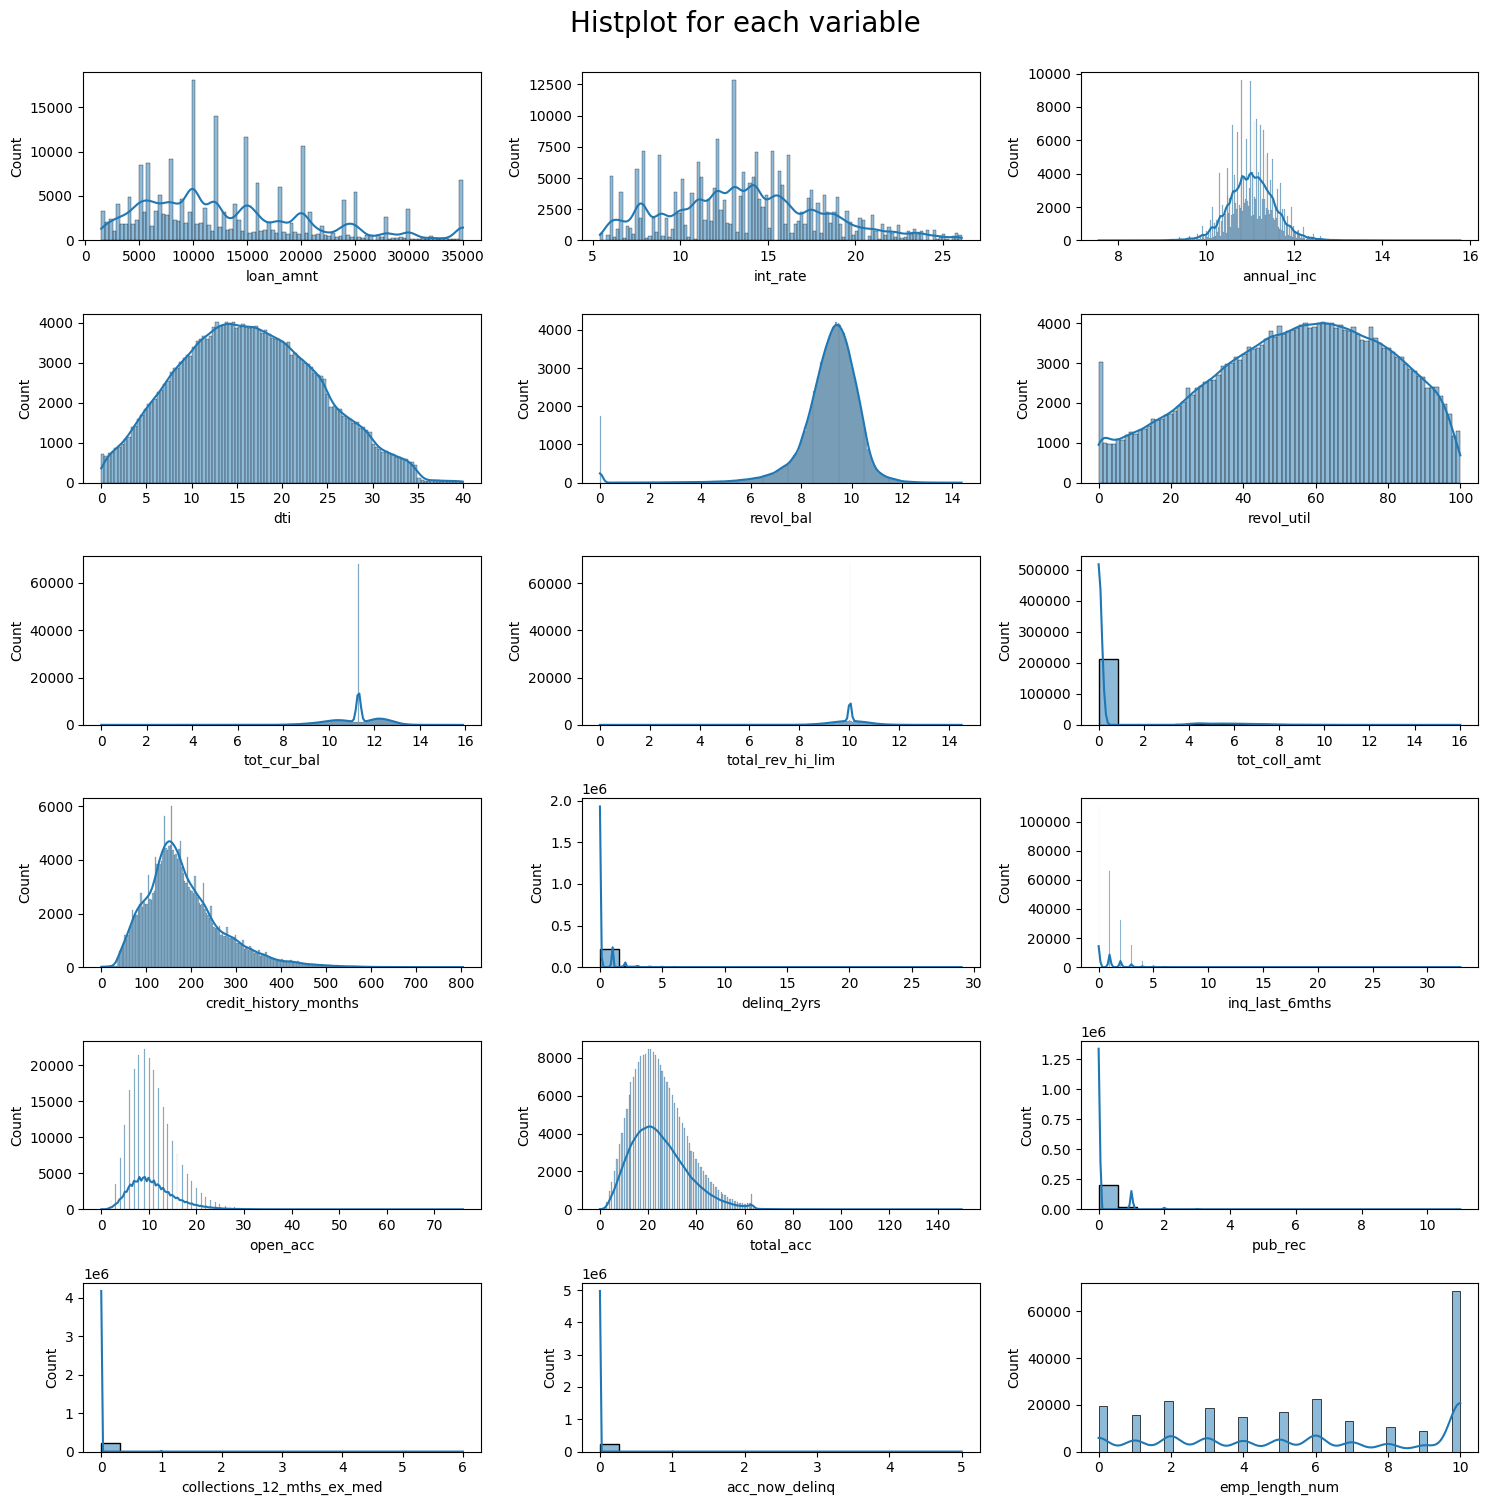

In [67]:
histplot_visual(data=df,column=hist_box_cols+hist_only_cols, n_row = 6, n_col = 3)
plt.tight_layout()

In [68]:
def boxplots_visual(data, columns, n_row, n_col, by=None):
    fig, ax = plt.subplots(n_row, n_col, figsize=(15, 15))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax = ax.flatten()

    for i, feature in enumerate(columns):
        if by is None:
            sns.boxplot(
                x=data[feature],
                ax=ax[i],
                orient='h'
            )
        else:
            sns.boxplot(
                x=feature,
                y=by,
                data=data,
                ax=ax[i],
                orient='h'
            )

        skewness = round(data[feature].skew(skipna=True), 2)
        ax[i].set_title(f'{feature}, skewness: {skewness}', fontsize=10)

    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

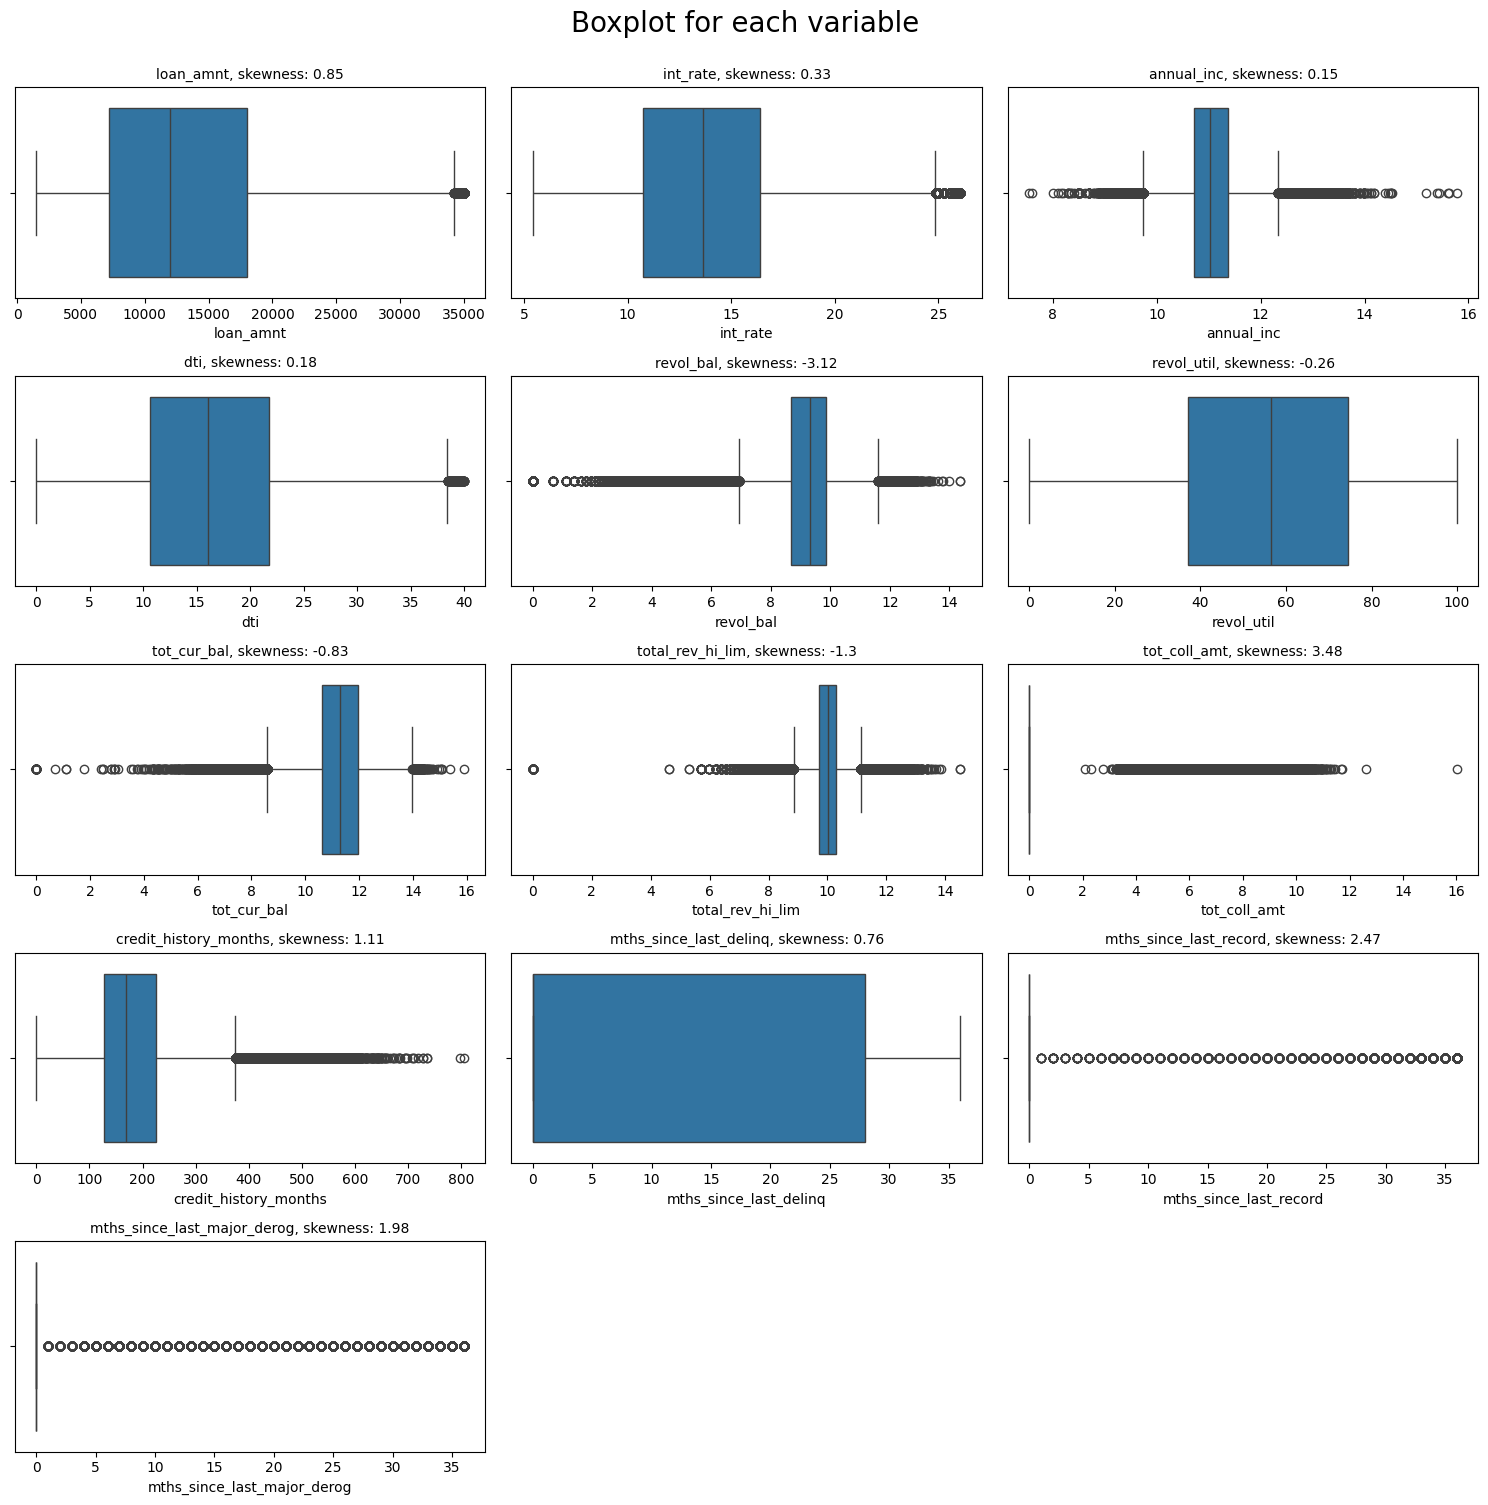

<Figure size 640x480 with 0 Axes>

In [69]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3)
plt.tight_layout()

### Categorical Data

In [70]:
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Length of categorical columns: ", len(categorical_cols))

Categorical columns: ['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'region']
Length of categorical columns:  7


In [71]:
def categorical_barplot_visual(data, columns, n_row, n_col, by=None):
    fig, ax = plt.subplots(n_row, n_col, figsize=(15, 10))
    fig.suptitle('Barplot for Categorical Variables', y=1, size=20)
    ax = ax.flatten()

    for i, feature in enumerate(columns):

        if by is None:
            value_counts = data[feature].value_counts(dropna=False)
            order = value_counts.index

            sns.barplot(
                x=order,
                y=value_counts.values,
                ax=ax[i]
            )

        else:
            order = (
                data[feature]
                .value_counts(dropna=False)
                .index
            )

            sns.countplot(
                data=data,
                x=feature,
                hue=by,
                order=order,
                ax=ax[i]
            )

        ax[i].set_title(
            f'{feature} (unique: {data[feature].nunique()})',
            fontsize=10
        )
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

In [72]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

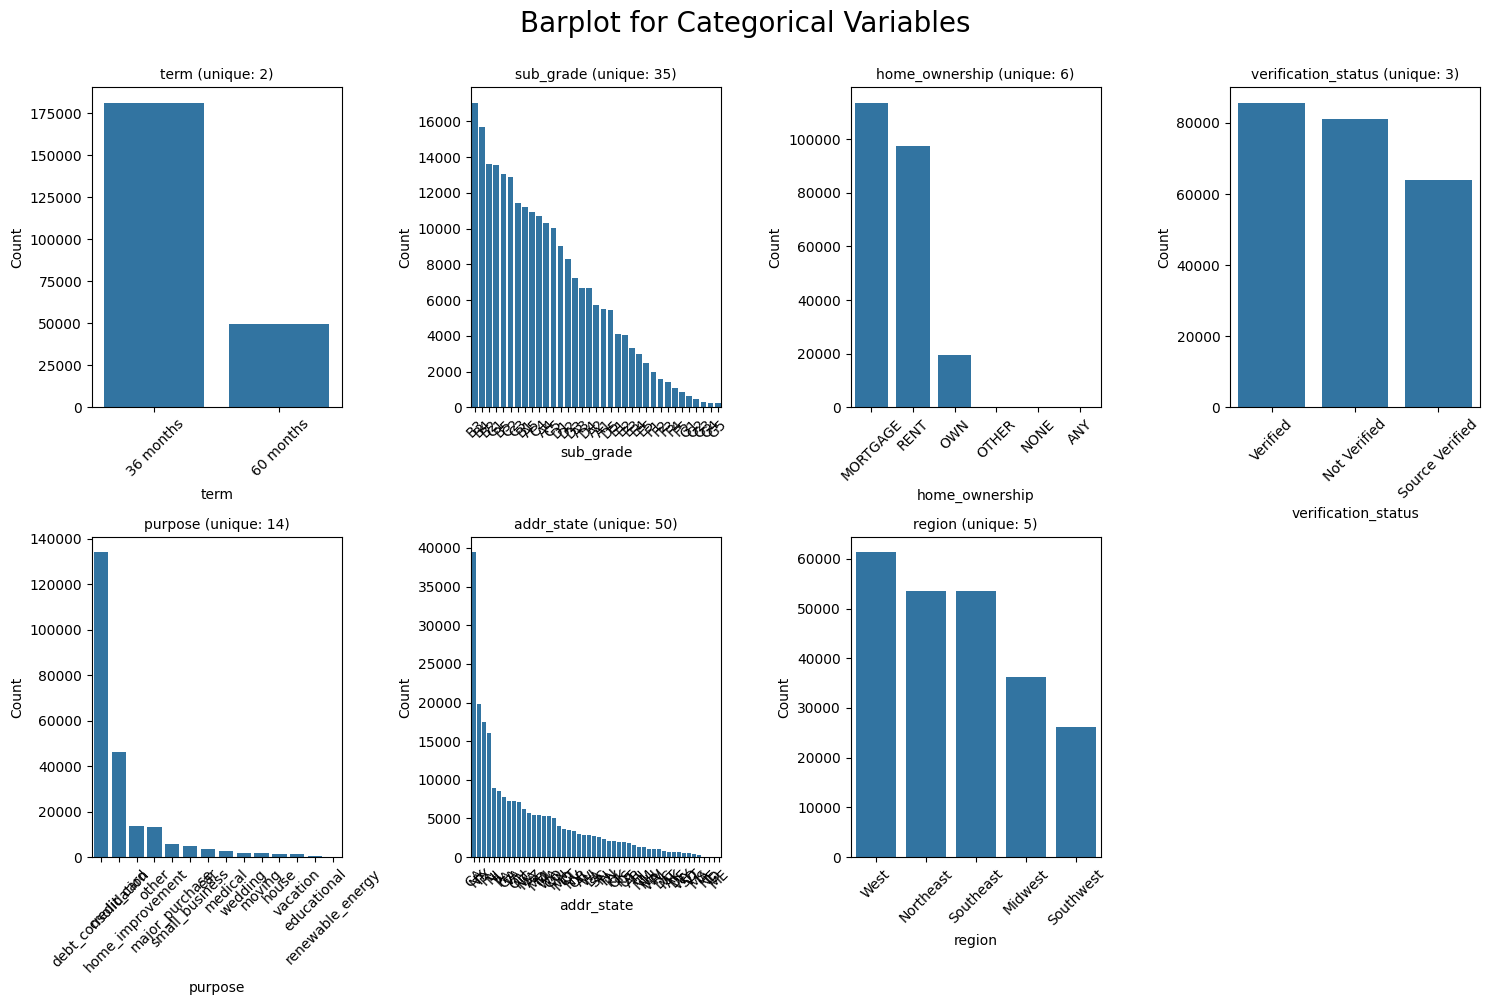

In [73]:
categorical_barplot_visual(
    data=df,
    columns=categorical_cols,
    n_row=2,
    n_col=4
)


## Bivariate Analysis

### Numerical Features vs Target

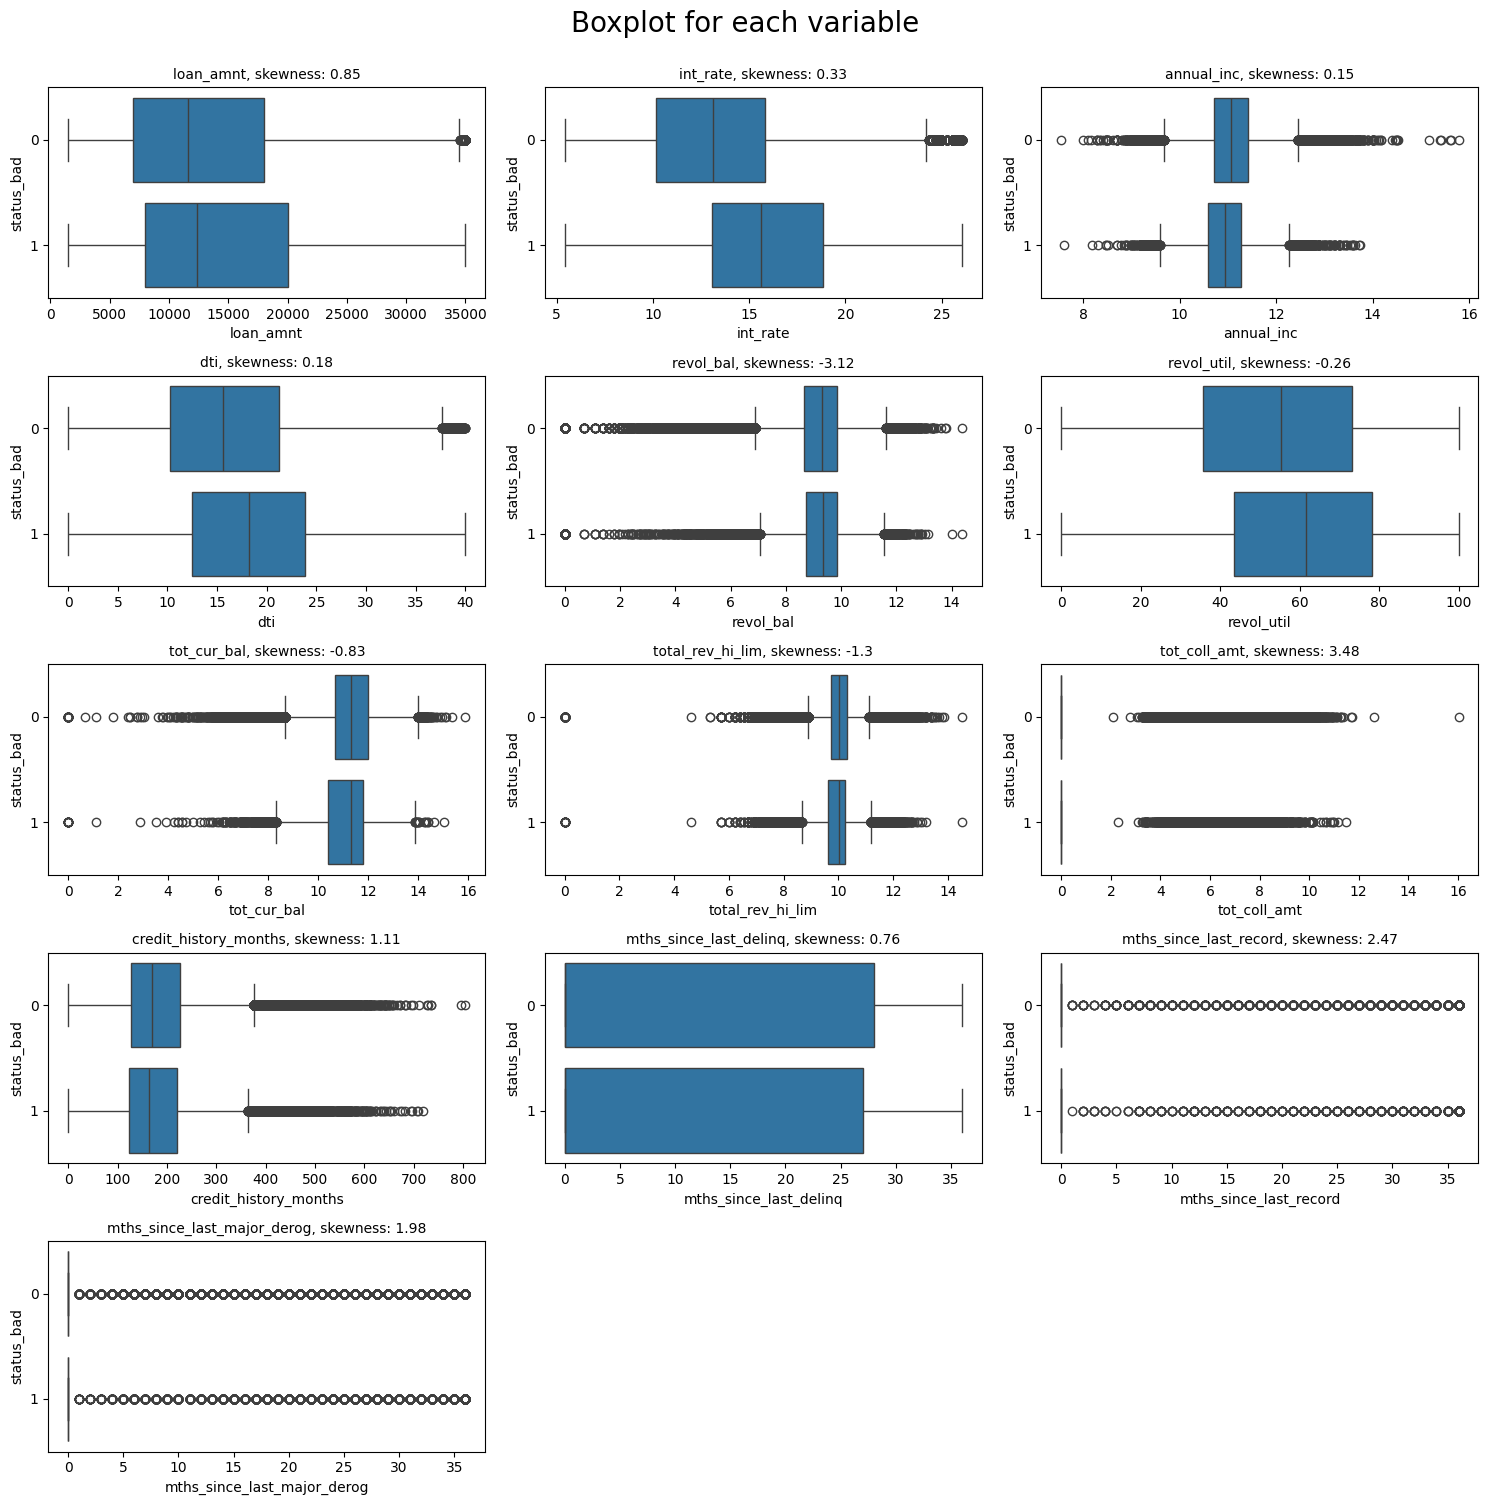

<Figure size 640x480 with 0 Axes>

In [74]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3, by = "status_bad")
plt.tight_layout()

### Categorical Features vs Target

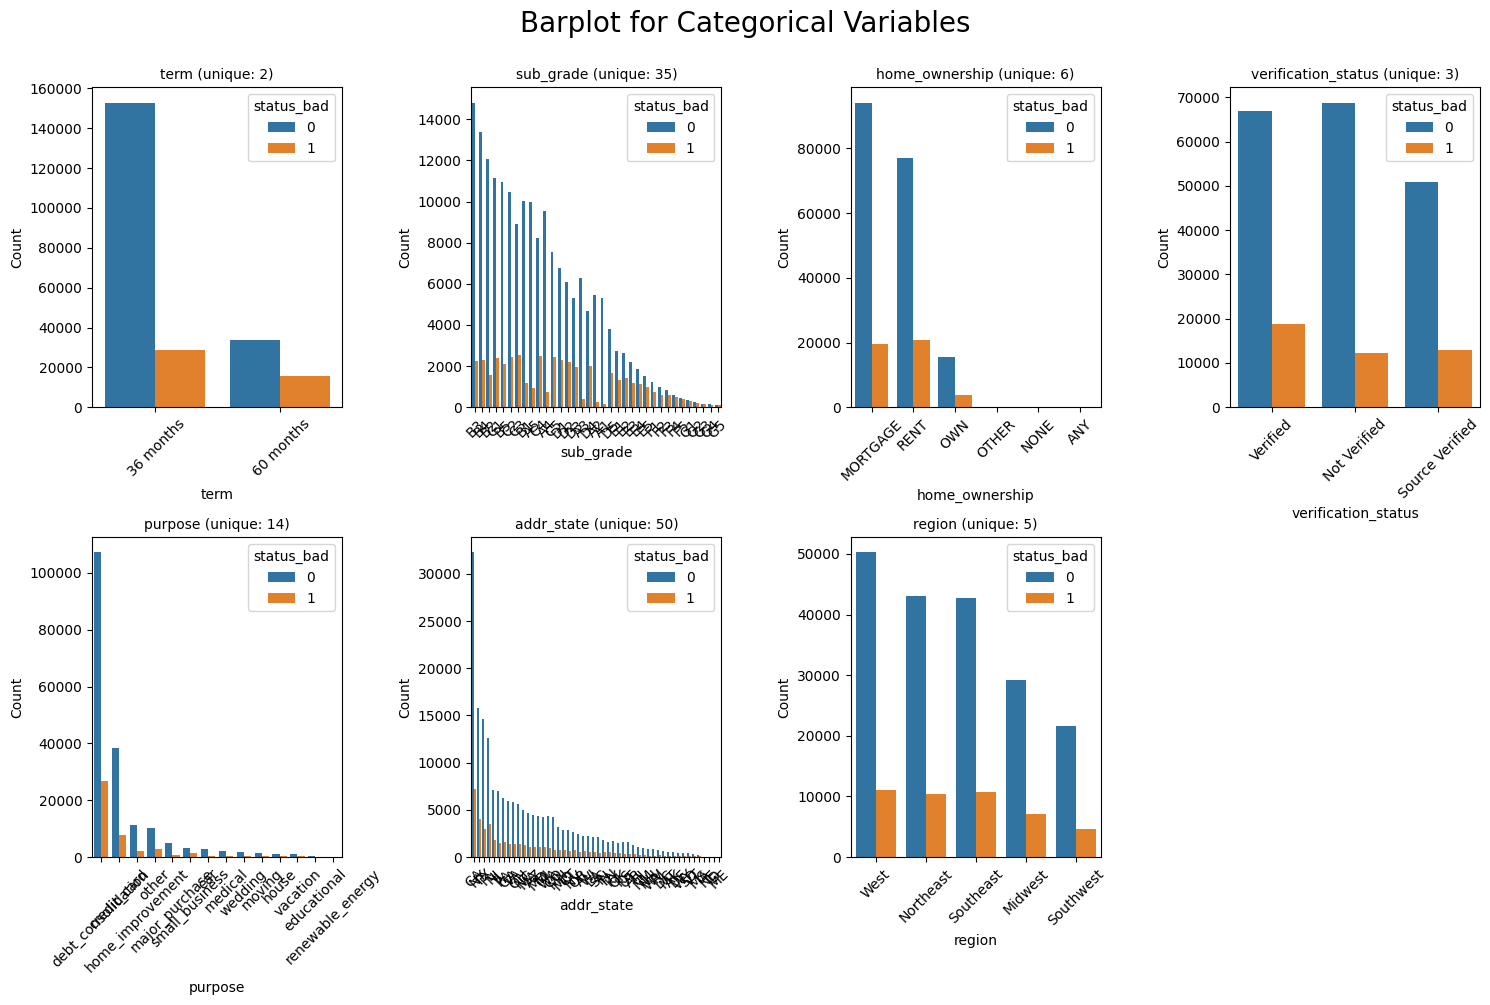

In [75]:
categorical_barplot_visual(
    data=df,
    columns=categorical_cols,
    n_row=2,
    n_col=4, 
    by = "status_bad"
)

## Multivariate Analysis

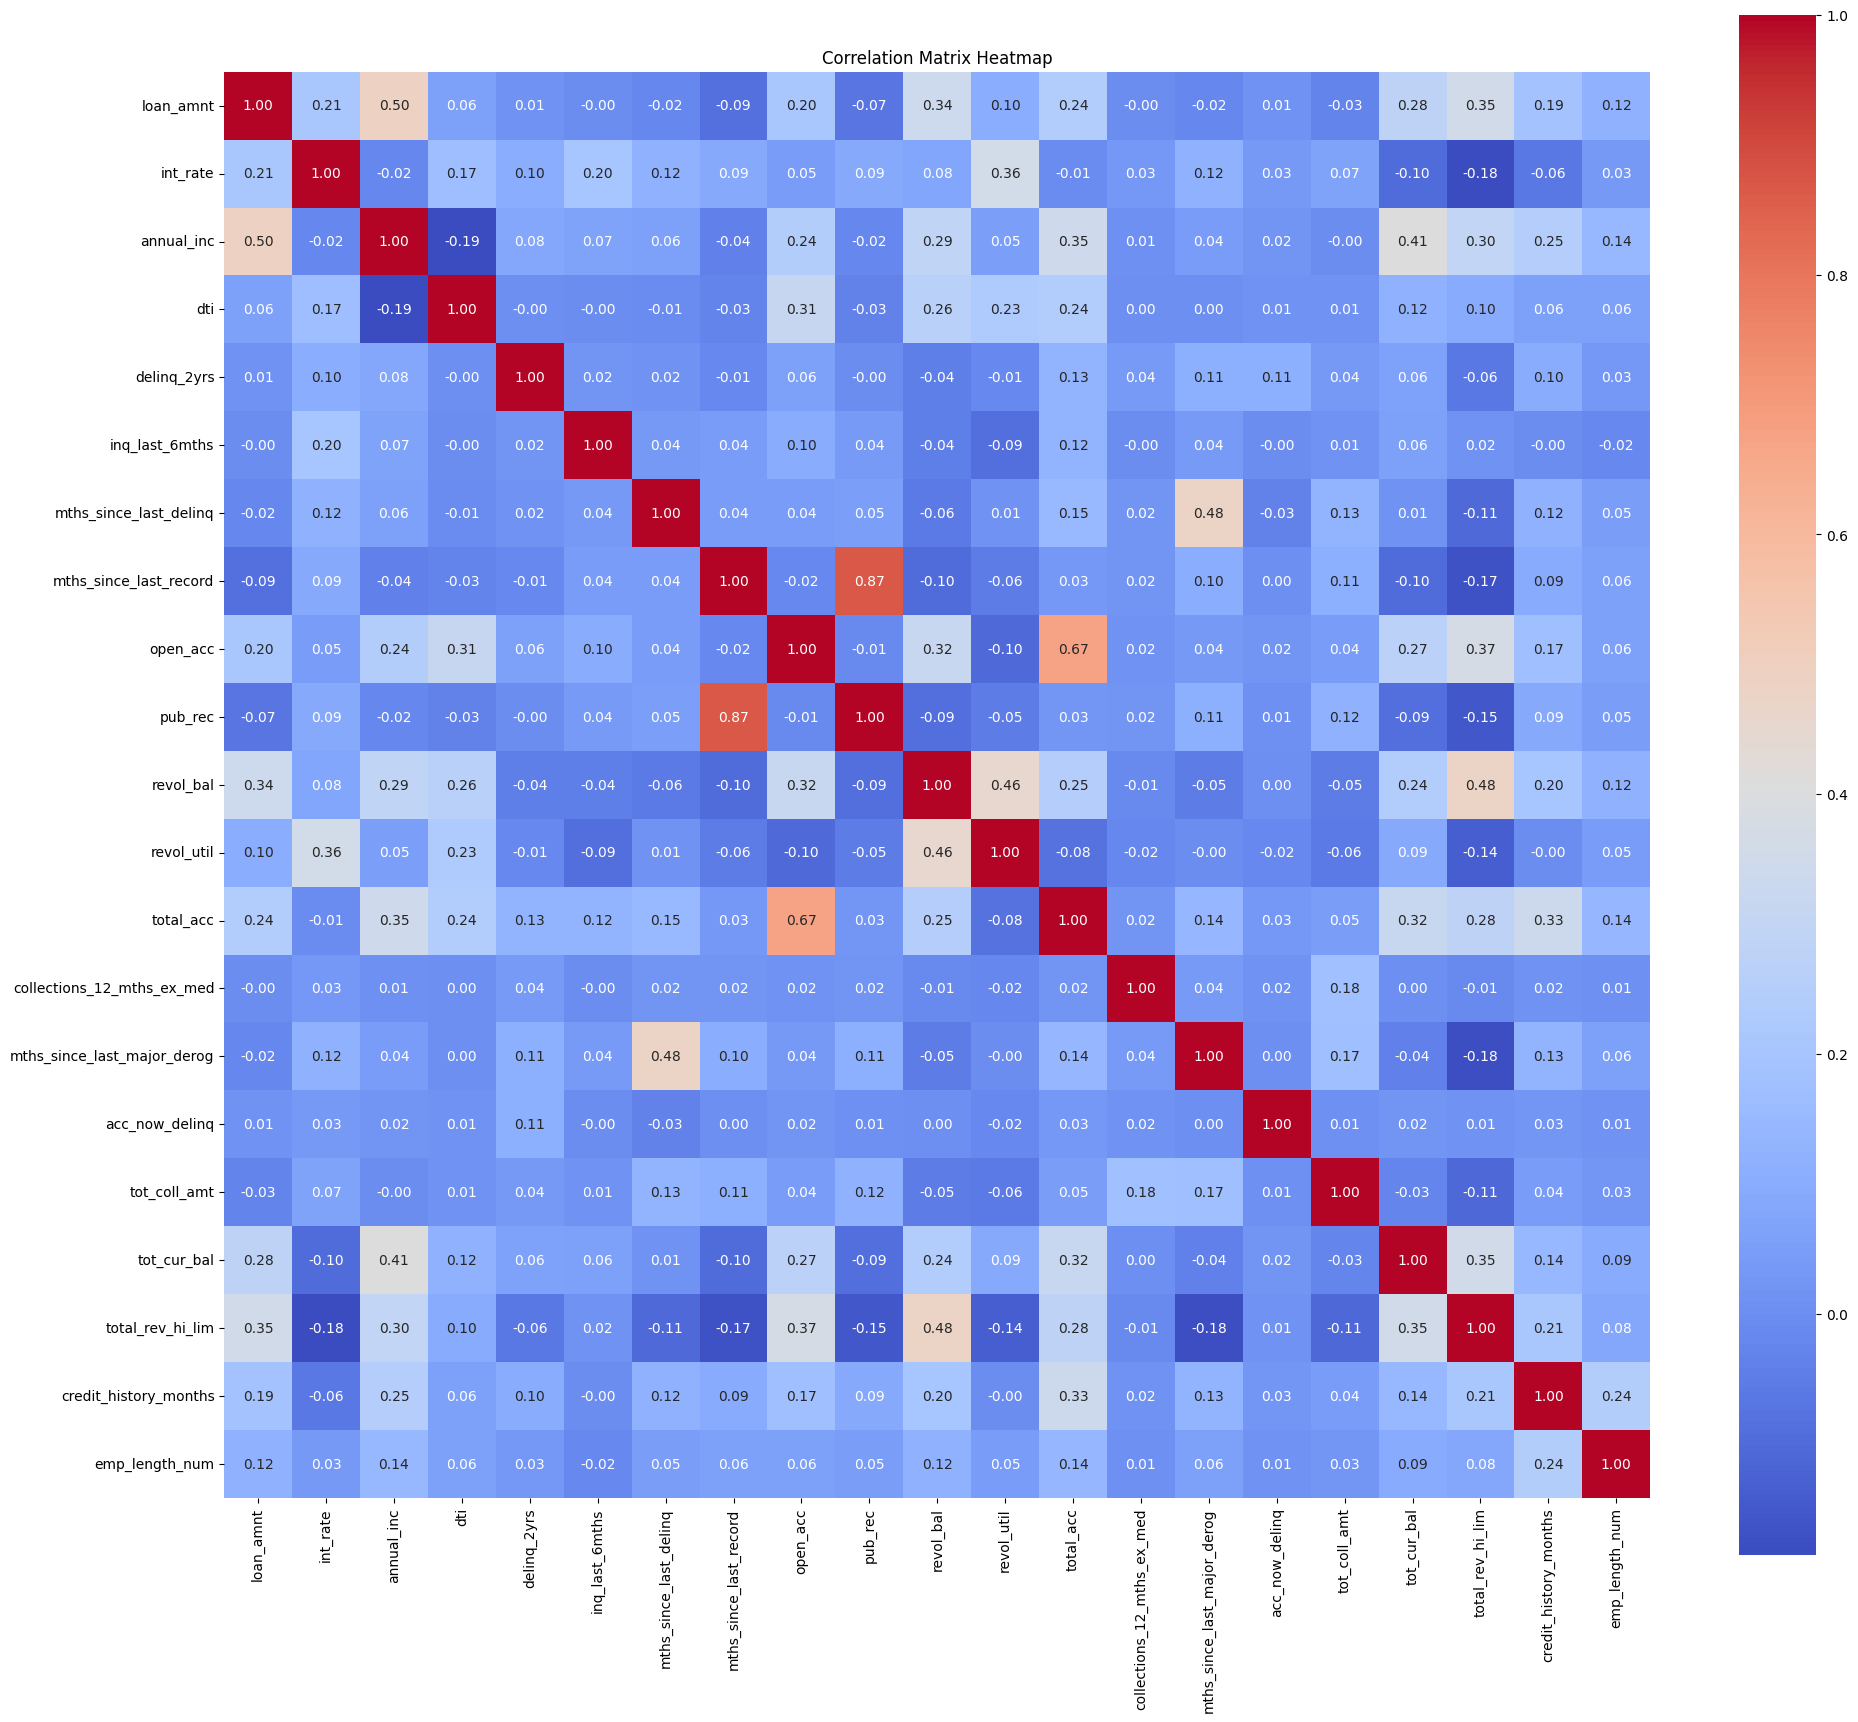

In [76]:
# Compute correlation matrix
corr_matrix = df[num_cols_eda].corr()

# Set plot size
plt.figure(figsize=(23, 20))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Show plot
plt.title("Correlation Matrix Heatmap")
plt.show()

# Insight

### 1. What are percentages of each loan status compared to total?

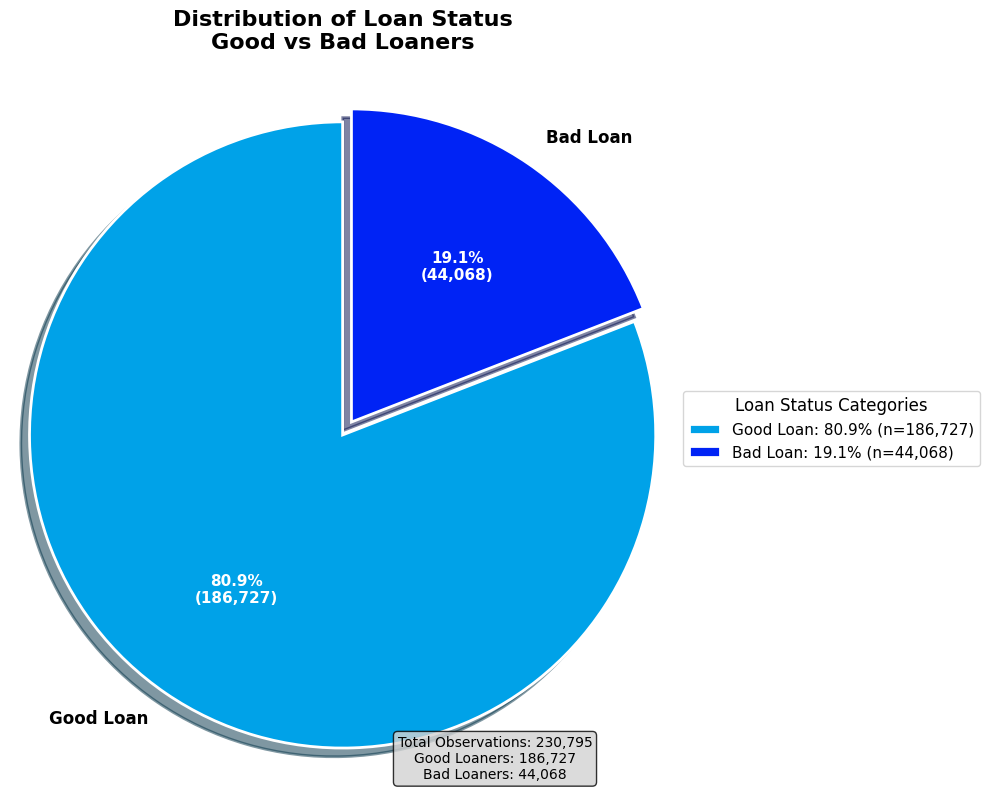

In [77]:
status_counts = df["status_bad"].value_counts(normalize=True)

labels_map = {
    0: "Good Loan",
    1: "Bad Loan"
}

colors = ['#00A2E8', '#0023F5']  
explode = (0.05, 0)  

fig, ax = plt.subplots(figsize=(10, 8))

labels = [labels_map[idx] for idx in status_counts.index]
sizes = status_counts.values
percentages = [f'{p:.1%}' for p in sizes]

# Buat pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

for i, (pct_label, autotext) in enumerate(zip(percentages, autotexts)):
    count = df["status_bad"].value_counts().iloc[i]  # Ambil count sebenarnya
    autotext.set_text(f'{pct_label}\n({count:,})')
    autotext.set_fontsize(11)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

legend_labels = [f'{label}: {pct} (n={count:,})' 
                 for label, pct, count in zip(labels, percentages, df["status_bad"].value_counts())]

ax.legend(wedges, legend_labels,
          title="Loan Status Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=11,
          title_fontsize=12)

plt.title('Distribution of Loan Status\nGood vs Bad Loaners', 
          fontsize=16, fontweight='bold', pad=20)

ax.axis('equal')

summary_text = f'Total Observations: {len(df):,}\n'
summary_text += f'Good Loaners: {df["status_bad"].value_counts().get(0, 0):,}\n'
summary_text += f'Bad Loaners: {df["status_bad"].value_counts().get(1, 0):,}'

plt.figtext(0.5, 0.02, summary_text, 
            ha='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\prima\AppData\Local\Temp\ipykernel_14424\2578381129.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=loan_amount_by_status,


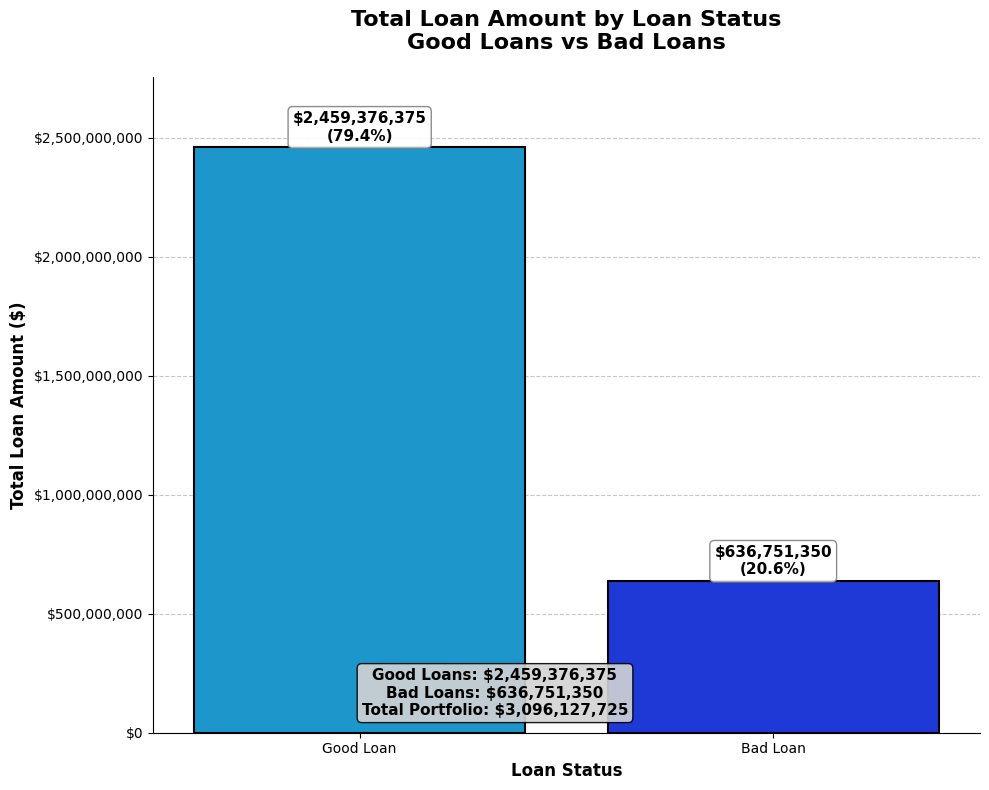

In [78]:
status_labels = {
    0: "Good Loan",
    1: "Bad Loan"
}

loan_amount_by_status = df.groupby('status_bad')['loan_amnt'].sum().reset_index()

loan_amount_by_status = loan_amount_by_status.sort_values('loan_amnt', ascending=False)

loan_amount_by_status['status_label'] = loan_amount_by_status['status_bad'].map(status_labels)

colors = ['#00A2E8' if status == 0 else '#0023F5' 
          for status in loan_amount_by_status['status_bad']]

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=loan_amount_by_status, 
                 x='status_label', 
                 y='loan_amnt',
                 palette=colors,
                 edgecolor='black',
                 linewidth=1.5)

for i, (idx, row) in enumerate(loan_amount_by_status.iterrows()):
    value_text = f'${row["loan_amnt"]:,.0f}'
    
    total_loan = loan_amount_by_status['loan_amnt'].sum()
    percentage = (row['loan_amnt'] / total_loan) * 100
    
    ax.text(i, row['loan_amnt'] + (total_loan * 0.005),  
            f'{value_text}\n({percentage:.1f}%)',
            ha='center', va='bottom',
            fontsize=11, fontweight='bold',
            color='black',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray', pad=0.3))

plt.ylabel('Total Loan Amount ($)', fontsize=12, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')

max_value = loan_amount_by_status['loan_amnt'].max()
plt.ylim(0, max_value * 1.12)  

plt.title('Total Loan Amount by Loan Status\nGood Loans vs Bad Loans', 
          fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

good_loan_amt = loan_amount_by_status.loc[loan_amount_by_status['status_bad'] == 0, 'loan_amnt']
bad_loan_amt = loan_amount_by_status.loc[loan_amount_by_status['status_bad'] == 1, 'loan_amnt']

if len(good_loan_amt) > 0 and len(bad_loan_amt) > 0:
    good_val = good_loan_amt.values[0] if len(good_loan_amt) > 0 else 0
    bad_val = bad_loan_amt.values[0] if len(bad_loan_amt) > 0 else 0
    
    summary_text = f"Good Loans: ${good_val:,.0f}\nBad Loans: ${bad_val:,.0f}\nTotal Portfolio: ${total_loan:,.0f}"
    
    plt.figtext(0.5, 0.1, summary_text, 
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.9, 
                         edgecolor='black', linewidth=1))

plt.subplots_adjust(bottom=0.15)  

plt.tight_layout()
plt.show()

### 2. What are top state and region with the most number of loans?

C:\Users\prima\AppData\Local\Temp\ipykernel_14424\2582621780.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_states_df,


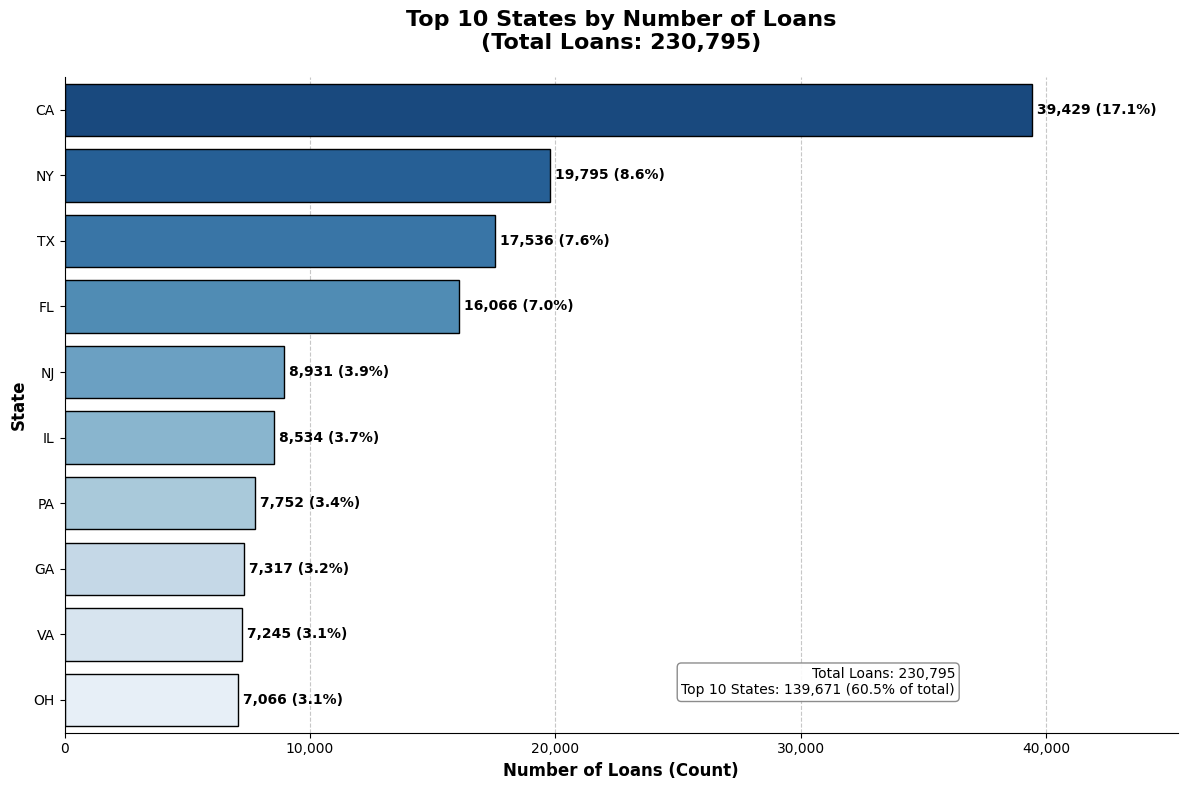

In [79]:
state_counts = df['addr_state'].value_counts()
top_10_states = state_counts.head(10)

total_count = len(df)
percentages = (top_10_states.values / total_count * 100)

top_states_df = top_10_states.reset_index()
top_states_df.columns = ['addr_state', 'count']
top_states_df['percentage'] = percentages

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_states_df, 
                 x='count', 
                 y='addr_state',
                 palette='Blues_r',
                 edgecolor='black',
                 linewidth=1)

for i, (count, pct) in enumerate(zip(top_states_df['count'], top_states_df['percentage'])):
    label_text = f'{count:,} ({pct:.1f}%)'
    
    ax.text(count + (max(top_states_df['count']) * 0.005), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=10,
            fontweight='bold')

plt.xlabel('Number of Loans (Count)', fontsize=12, fontweight='bold')
plt.ylabel('State', fontsize=12, fontweight='bold')

plt.title(f'Top 10 States by Number of Loans\n(Total Loans: {total_count:,})', 
          fontsize=16, fontweight='bold', pad=20)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(0, max(top_states_df['count']) * 1.15)

total_text = f'Total Loans: {total_count:,}\n'
total_text += f'Top 10 States: {top_states_df["count"].sum():,} ({top_states_df["count"].sum()/total_count*100:.1f}% of total)'

ax.text(0.8, 0.1, total_text,
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()
plt.show()


C:\Users\prima\AppData\Local\Temp\ipykernel_14424\3650521993.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_df,


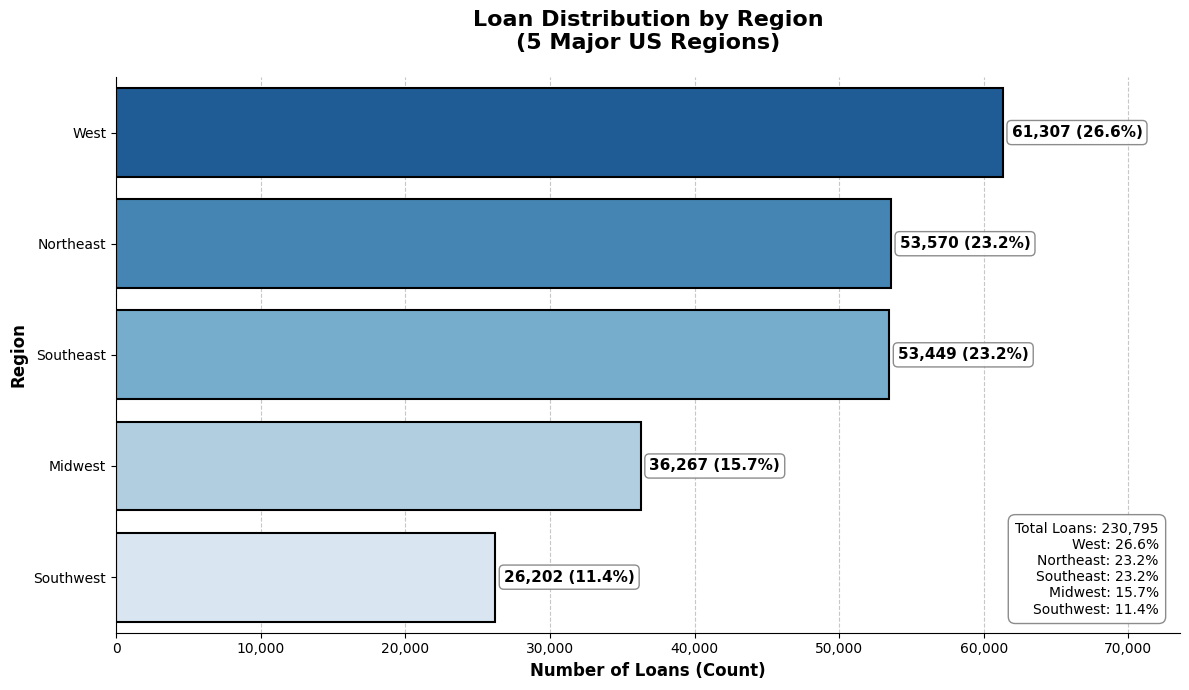

In [80]:
region_counts = df['region'].value_counts()
total_count = len(df)

percentages = (region_counts.values / total_count * 100)

region_df = region_counts.reset_index()
region_df.columns = ['region', 'count']
region_df['percentage'] = percentages

region_df = region_df.sort_values('count', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=region_df, 
                 x='count', 
                 y='region',
                 palette='Blues_r',  
                 edgecolor='black',
                 linewidth=1.5,
                 saturation=0.8)

for i, (count, pct) in enumerate(zip(region_df['count'], region_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,} ({pct:.1f}%)'
    
    ax.text(count + (max(region_df['count']) * 0.01), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=11,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                     edgecolor='gray', pad=0.3))

plt.xlabel('Number of Loans (Count)', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')

plt.title('Loan Distribution by Region\n(5 Major US Regions)', 
          fontsize=16, fontweight='bold', pad=20)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(0, max(region_df['count']) * 1.2)

summary_text = f'Total Loans: {total_count:,}\n'
for region, count, pct in zip(region_df['region'], region_df['count'], region_df['percentage']):
    summary_text += f'{region}: {pct:.1f}%\n'

ax.text(0.98, 0.2, summary_text.strip(),
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                 edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

### 3. What is people's most purpose for this loan?

C:\Users\prima\AppData\Local\Temp\ipykernel_14424\252026142.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=purpose_df,
C:\Users\prima\AppData\Local\Temp\ipykernel_14424\252026142.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_labels, fontsize=11)


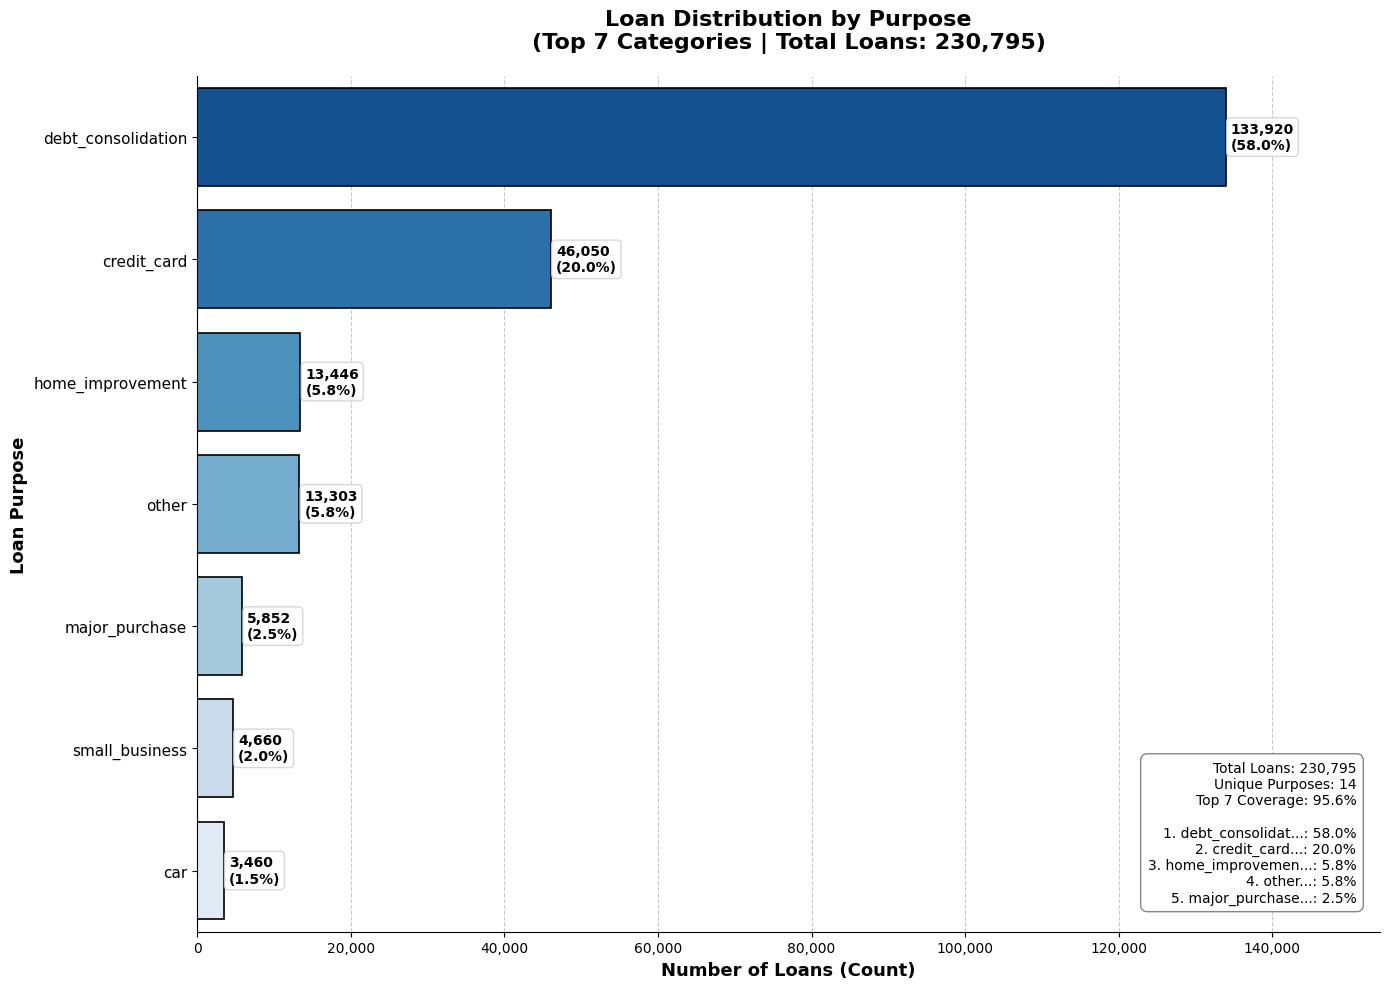

In [81]:
purpose_counts = df['purpose'].value_counts()
total_count = len(df)

n_to_show = min(7, len(purpose_counts))  
top_purposes = purpose_counts.head(n_to_show)

percentages = (top_purposes.values / total_count * 100)

purpose_df = top_purposes.reset_index()
purpose_df.columns = ['purpose', 'count']
purpose_df['percentage'] = percentages

purpose_df = purpose_df.sort_values('count', ascending=False)

plt.figure(figsize=(14, 10))
ax = sns.barplot(data=purpose_df, 
                 x='count', 
                 y='purpose',
                 palette='Blues_r',  
                 edgecolor='black',
                 linewidth=1.2,
                 saturation=0.85)

def format_purpose_label(purpose, max_length=25):
    if len(purpose) > max_length:
        return '\n'.join(textwrap.wrap(purpose, max_length))
    return purpose

formatted_labels = [format_purpose_label(p) for p in purpose_df['purpose']]
ax.set_yticklabels(formatted_labels, fontsize=11)

for i, (count, pct) in enumerate(zip(purpose_df['count'], purpose_df['percentage'])):
    label_text = f'{count:,}\n({pct:.1f}%)'
    
    ax.text(count + (max(purpose_df['count']) * 0.005), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                     edgecolor='lightgray', pad=0.3))

plt.xlabel('Number of Loans (Count)', fontsize=13, fontweight='bold')
plt.ylabel('Loan Purpose', fontsize=13, fontweight='bold')

title_text = f'Loan Distribution by Purpose\n(Top {n_to_show} Categories | Total Loans: {total_count:,})'
plt.title(title_text, fontsize=16, fontweight='bold', pad=20)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(0, max(purpose_df['count']) * 1.15)

summary_text = f'Total Loans: {total_count:,}\n'
summary_text += f'Unique Purposes: {len(purpose_counts)}\n'
summary_text += f'Top {n_to_show} Coverage: {top_purposes.sum()/total_count*100:.1f}%\n\n'

for i, (purpose, count, pct) in enumerate(zip(purpose_df['purpose'], 
                                              purpose_df['count'], 
                                              purpose_df['percentage'])):
    if i < 5:  
        summary_text += f'{i+1}. {purpose[:15]}...: {pct:.1f}%\n'

ax.text(0.98, 0.2, summary_text.strip(),
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.95, 
                 edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

### 4. What is the loan trend look like?

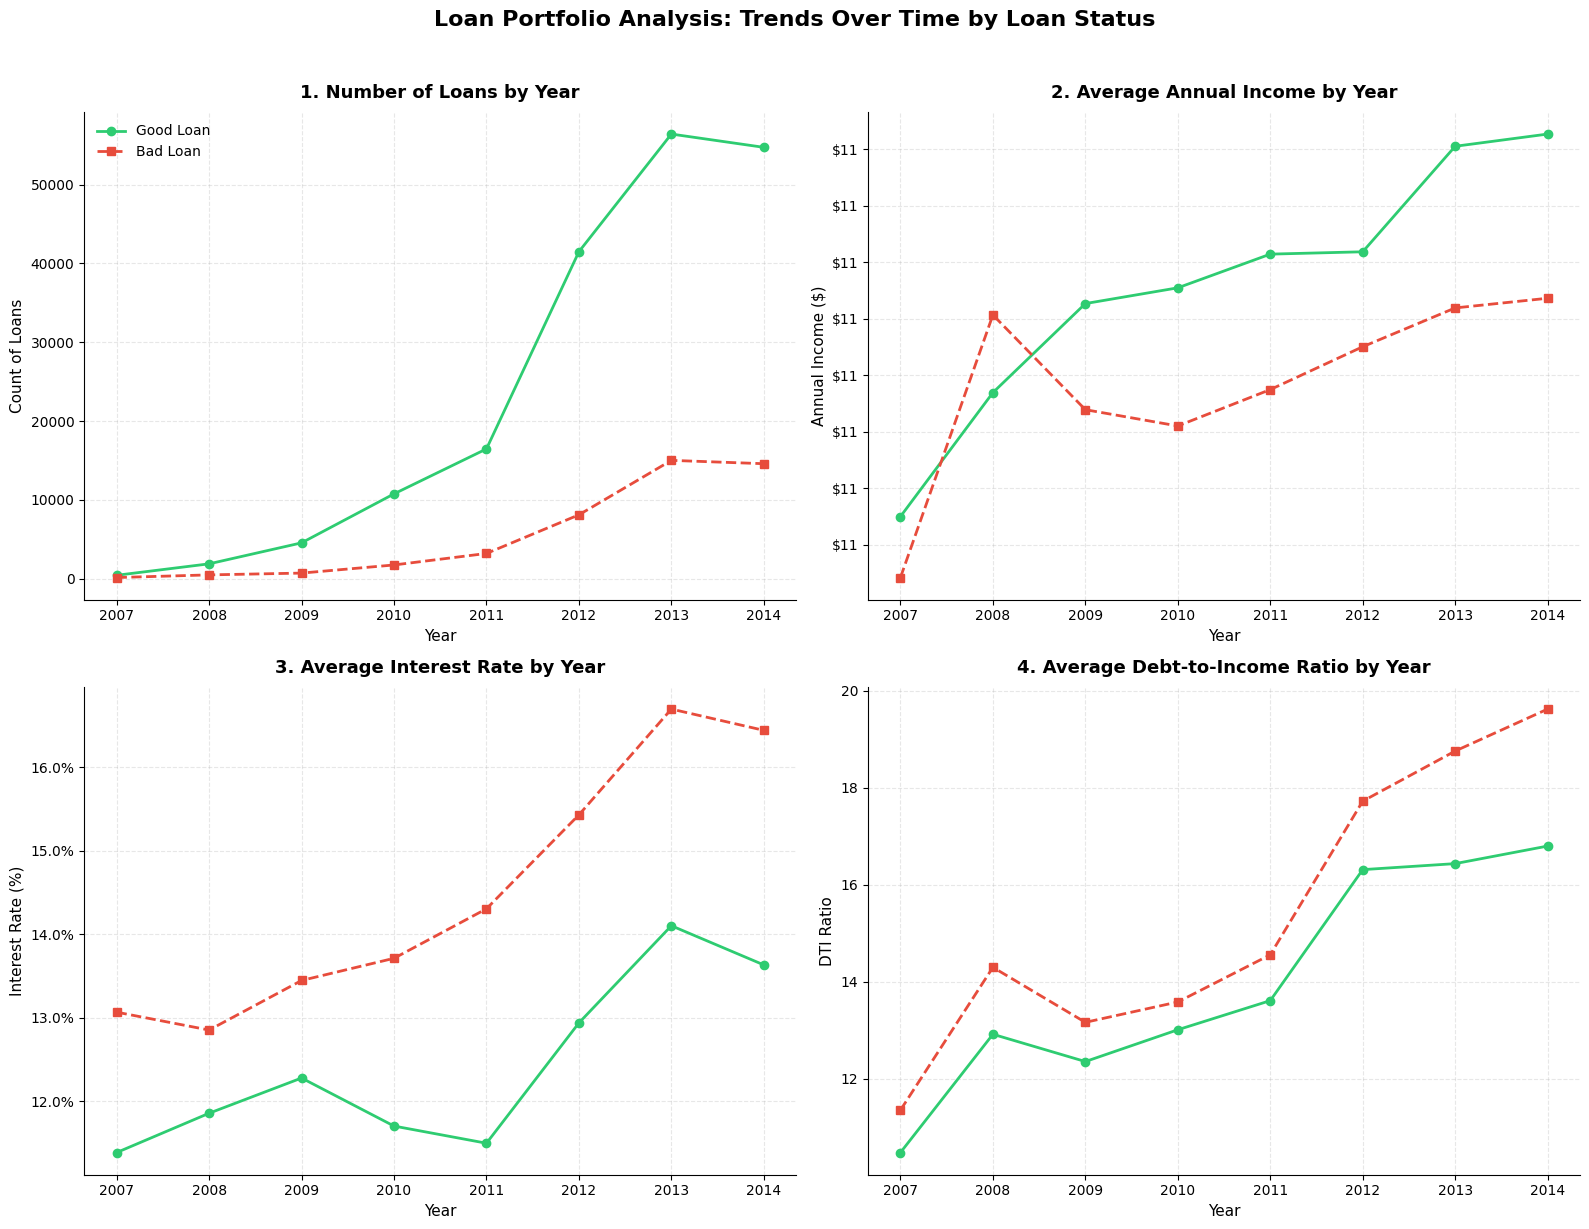

In [118]:
def apply_plot_style(ax, title, ylabel, show_legend=True):
    """Apply consistent styling to plots"""
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.tick_params(axis='both', labelsize=10)
    
    ax.grid(True, linestyle='--', alpha=0.3)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if show_legend:
        ax.legend(fontsize=10, frameon=False)
    else:
        ax.legend().remove()

required_cols = ['years', 'status_bad', 'annual_inc', 'int_rate', 'dti']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"Column not found: {missing_cols}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = {'good_loan': '#2ECC71', 'bad_loan': '#E74C3C'}
line_styles = {'good_loan': '-', 'bad_loan': '--'}
markers = {'good_loan': 'o', 'bad_loan': 's'}

# ============================
# CHART 1: NUMBER OF LOANS (Count)
# ============================
ax1 = axes[0]
loan_count_data = df.groupby(['years', 'status_bad']).size().unstack(fill_value=0)

# Rename columns
if 0 in loan_count_data.columns:
    loan_count_data = loan_count_data.rename(columns={0: 'good_loan'})
if 1 in loan_count_data.columns:
    loan_count_data = loan_count_data.rename(columns={1: 'bad_loan'})

# Plot
for status in ['good_loan', 'bad_loan']:
    if status in loan_count_data.columns:
        ax1.plot(loan_count_data.index, 
                loan_count_data[status],
                label=status.replace('_', ' ').title(),
                color=colors[status],
                linestyle=line_styles[status],
                marker=markers[status],
                markersize=6,
                linewidth=2)

apply_plot_style(ax1, '1. Number of Loans by Year', 'Count of Loans')

# ============================
# CHART 2: AVERAGE ANNUAL INCOME
# ============================
ax2 = axes[1]
if 'annual_inc' in df.columns:
    annual_inc_data = df.groupby(['years', 'status_bad'])['annual_inc'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in annual_inc_data.columns:
        annual_inc_data = annual_inc_data.rename(columns={0: 'good_loan'})
    if 1 in annual_inc_data.columns:
        annual_inc_data = annual_inc_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in annual_inc_data.columns:
            ax2.plot(annual_inc_data.index, 
                    annual_inc_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax2, '2. Average Annual Income by Year', 'Annual Income ($)', show_legend=False)
    
    ax2.ticklabel_format(style='plain', axis='y')
    ax2.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'${x:,.0f}')
)


else:
    ax2.text(0.5, 0.5, 'annual_inc column\nnot available', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('2. Average Annual Income by Year', fontsize=13, fontweight='bold', pad=10)

# ============================
# CHART 3: AVERAGE INTEREST RATE
# ============================
ax3 = axes[2]
if 'int_rate' in df.columns:
    # Hitung rata-rata interest rate per tahun per status
    int_rate_data = df.groupby(['years', 'status_bad'])['int_rate'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in int_rate_data.columns:
        int_rate_data = int_rate_data.rename(columns={0: 'good_loan'})
    if 1 in int_rate_data.columns:
        int_rate_data = int_rate_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in int_rate_data.columns:
            ax3.plot(int_rate_data.index, 
                    int_rate_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax3, '3. Average Interest Rate by Year', 'Interest Rate (%)', show_legend=False)
    
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
else:
    ax3.text(0.5, 0.5, 'int_rate column\nnot available', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('3. Average Interest Rate by Year', fontsize=13, fontweight='bold', pad=10)

# ============================
# CHART 4: AVERAGE DEBT-TO-INCOME RATIO
# ============================
ax4 = axes[3]
if 'dti' in df.columns:
    dti_data = df.groupby(['years', 'status_bad'])['dti'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in dti_data.columns:
        dti_data = dti_data.rename(columns={0: 'good_loan'})
    if 1 in dti_data.columns:
        dti_data = dti_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in dti_data.columns:
            ax4.plot(dti_data.index, 
                    dti_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax4, '4. Average Debt-to-Income Ratio by Year', 'DTI Ratio', show_legend=False)
else:
    ax4.text(0.5, 0.5, 'dti column\nnot available', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('4. Average Debt-to-Income Ratio by Year', fontsize=13, fontweight='bold', pad=10)

plt.suptitle('Loan Portfolio Analysis: Trends Over Time by Loan Status', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

### 5. What is the biggest subgrade that has greates number of loans?

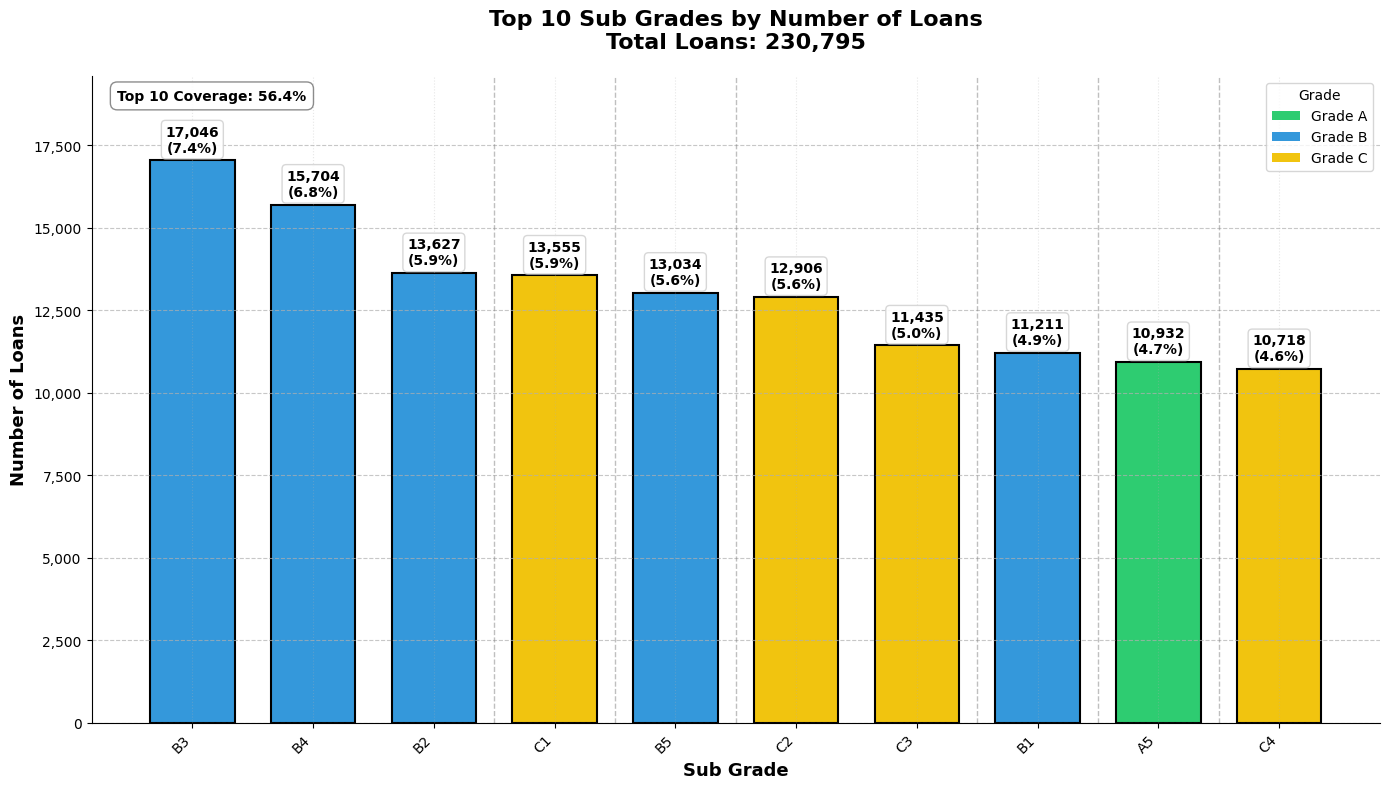

In [83]:
sub_grade_counts = df['sub_grade'].value_counts()
top_10_subgrades = sub_grade_counts.head(10)  # Ambil 10 teratas

total_count = len(df)

percentages = (top_10_subgrades.values / total_count * 100)

top_subgrades_df = top_10_subgrades.reset_index()
top_subgrades_df.columns = ['sub_grade', 'count']
top_subgrades_df['percentage'] = percentages
top_subgrades_df['grade'] = top_subgrades_df['sub_grade'].str[0]

top_subgrades_df = top_subgrades_df.sort_values('count', ascending=False).reset_index(drop=True)

grade_colors = {
    'A': '#2ECC71',  
    'B': '#3498DB',  
    'C': '#F1C40F',  
    'D': '#E67E22',  
    'E': '#E74C3C',  
    'F': '#C0392B', 
    'G': '#7D3C98'   
}

plt.figure(figsize=(14, 8))

bars = plt.bar(range(len(top_subgrades_df)), 
               top_subgrades_df['count'],
               color=[grade_colors.get(g, '#95A5A6') for g in top_subgrades_df['grade']],
               edgecolor='black',
               linewidth=1.5,
               width=0.7)

for i, (count, pct) in enumerate(zip(top_subgrades_df['count'], top_subgrades_df['percentage'])):
    label_text = f'{count:,}\n({pct:.1f}%)'
    
    plt.text(i, 
             count + (max(top_subgrades_df['count']) * 0.01), 
             label_text,
             ha='center', 
             va='bottom',
             fontsize=10,
             fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                      edgecolor='lightgray', pad=0.3))

plt.xlabel('Sub Grade', fontsize=13, fontweight='bold')
plt.ylabel('Number of Loans', fontsize=13, fontweight='bold')

plt.xticks(range(len(top_subgrades_df)), top_subgrades_df['sub_grade'], rotation=45, ha='right')

plt.title(f'Top 10 Sub Grades by Number of Loans\nTotal Loans: {total_count:,}', 
          fontsize=16, fontweight='bold', pad=20)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle=':', alpha=0.3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0, max(top_subgrades_df['count']) * 1.15)

current_grade = None
for i, sub_grade in enumerate(top_subgrades_df['sub_grade']):
    grade = sub_grade[0]
    if grade != current_grade and current_grade is not None:
        plt.axvline(x=i-0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    current_grade = grade

from matplotlib.patches import Patch
unique_grades = sorted(top_subgrades_df['grade'].unique())
legend_elements = [Patch(facecolor=grade_colors[g], label=f'Grade {g}') for g in unique_grades]
plt.legend(handles=legend_elements, title='Grade', loc='upper right', fontsize=10)

coverage = top_subgrades_df['count'].sum() / total_count * 100
summary_text = f'Top 10 Coverage: {coverage:.1f}%'
plt.text(0.02, 0.98, summary_text,
         transform=ax.transAxes,
         ha='left',
         va='top',
         fontsize=10,
         fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                  edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   purpose                              230795 non-null  object        
 9   addr_state                           230795 non-null  object        
 10  d

In [85]:
df.drop(columns = ["issue_d", "addr_state"], inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  Int64  
 1   term                                 230795 non-null  object 
 2   int_rate                             230795 non-null  float64
 3   sub_grade                            230795 non-null  object 
 4   home_ownership                       230795 non-null  object 
 5   annual_inc                           230795 non-null  float64
 6   verification_status                  230795 non-null  object 
 7   purpose                              230795 non-null  object 
 8   dti                                  230795 non-null  float64
 9   delinq_2yrs                          230795 non-null  Int64  
 10  inq_last_6mths                       230795 non-null  Int64  
 11  mths_since_last_de

# Data Encoding

In [87]:
cat_cols_final = list(df.select_dtypes(include = "object").columns)

In [88]:
for col in cat_cols_final:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: term
[' 36 months' ' 60 months']

Column: sub_grade
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']

Column: home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Column: verification_status
['Verified' 'Source Verified' 'Not Verified']

Column: purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

Column: region
['Southwest' 'Southeast' 'Midwest' 'West' 'Northeast']


In [89]:
df['term'] = df['term'].str.strip().map({
    '36 months': 0,
    '60 months': 1
})

In [90]:
subgrade_order = [
    'A1','A2','A3','A4','A5',
    'B1','B2','B3','B4','B5',
    'C1','C2','C3','C4','C5',
    'D1','D2','D3','D4','D5',
    'E1','E2','E3','E4','E5',
    'F1','F2','F3','F4','F5',
    'G1','G2','G3','G4','G5'
]

subgrade_mapping = {grade: i+1 for i, grade in enumerate(subgrade_order)}

df['sub_grade_ord'] = df['sub_grade'].map(subgrade_mapping)

In [91]:
df['home_ownership_grouped'] = df['home_ownership'].replace({
    'NONE': 'OTHER',
    'ANY': 'OTHER'
})

df = pd.get_dummies(
    df,
    columns=['home_ownership_grouped'],
    prefix='home_ownership',
    drop_first=True
)

In [92]:
verification_mapping = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2
}

df['verification_status_ord'] = df['verification_status'].map(verification_mapping)

In [93]:
rare_purpose = ['renewable_energy', 'educational', 'moving']

df['purpose_grouped'] = df['purpose'].replace(
    {p: 'other' for p in rare_purpose}
)

In [94]:
df = pd.get_dummies(
    df,
    columns=['purpose_grouped'],
    prefix='purpose',
    drop_first=True
)

In [95]:
df = pd.get_dummies(
    df,
    columns=['region'],
    prefix='region',
    drop_first=True
)

In [96]:
df.drop(
    columns=[
        'sub_grade',
        'home_ownership',
        'verification_status',
        'purpose'
    ],
    inplace=True,
    errors='ignore'
)


In [97]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [98]:
df.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months,years,mths_since_last_record_missing,mths_since_last_major_derog_missing,mths_since_last_delinq_missing,total_rev_hi_lim_missing,tot_cur_bal_missing,tot_coll_amt_missing,emp_length_num,emp_length_missing,status_bad,mths_since_last_delinq_outlier,mths_since_last_record_outlier,mths_since_last_major_derog_outlier,loan_amnt_outlier,annual_inc_outlier,revol_bal_outlier,tot_cur_bal_outlier,total_rev_hi_lim_outlier,tot_coll_amt_outlier,int_rate_outlier,dti_outlier,revol_util_outlier,sub_grade_ord,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_ord,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,region_Northeast,region_Southeast,region_Southwest,region_West
0,5000,0,10.65,10.085851,27.65,0,1,0,0,3,0,9.521422,83.7,9,0,0,0,0.0,11.308849,10.03456,327.666667,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500,1,15.27,10.308986,1.00,0,5,0,0,3,0,7.4313,9.4,4,0,0,0,0.0,11.308849,10.03456,154.233333,2011,1,1,1,1,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,14,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2400,0,15.96,9.413526,8.72,0,2,0,0,2,0,7.991931,98.5,10,0,0,0,0.0,11.308849,10.03456,122.733333,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,10000,0,13.49,10.803669,20.00,0,1,35,0,10,0,8.630343,21.0,37,0,0,0,0.0,11.308849,10.03456,192.733333,2011,1,1,0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,5000,0,7.90,10.491302,11.20,0,3,0,0,9,0,8.982687,28.3,12,0,0,0,0.0,11.308849,10.03456,86.200000,2011,1,1,1,1,1,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 62 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  Int64  
 1   term                                 230795 non-null  int64  
 2   int_rate                             230795 non-null  float64
 3   annual_inc                           230795 non-null  float64
 4   dti                                  230795 non-null  float64
 5   delinq_2yrs                          230795 non-null  Int64  
 6   inq_last_6mths                       230795 non-null  Int64  
 7   mths_since_last_delinq               230795 non-null  Int64  
 8   mths_since_last_record               230795 non-null  Int64  
 9   open_acc                             230795 non-null  Int64  
 10  pub_rec                              230795 non-null  Int64  
 11  revol_bal         

# Machine Learning

In [100]:
X = df.drop("status_bad", axis=1)
y = df["status_bad"]

In [101]:
# Splitting data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape from data train and data test
print ("Shape of data train:", X_train.shape) 
print ("Shape of data test:", X_test.shape)

Shape of data train: (184636, 61)
Shape of data test: (46159, 61)


In [102]:
X_train = X_train.astype(float)

In [103]:
oversampling = SMOTE(random_state=12, sampling_strategy=1)

# Fit the over sampling
X_train_resampled, y_train_resampled = oversampling.fit_resample(X_train, y_train)

In [104]:
y_train_resampled.value_counts()

status_bad
0    149381
1    149381
Name: count, dtype: Int64

In [105]:
X_train_resampled.shape

(298762, 61)

In [106]:
y_train_resampled.shape

(298762,)

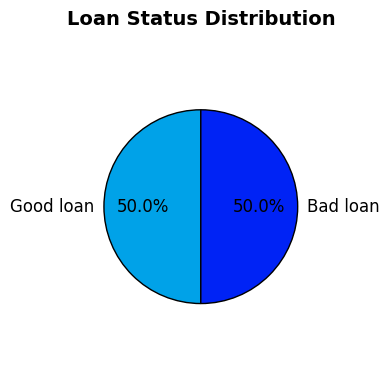

In [107]:
# Count good vs bad loans
loan_counts = y_train_resampled.value_counts()
labels = ['Good loan', 'Bad loan']
sizes = loan_counts.values
colors = ['#00A2E8', '#0023F5'] 

# Create donut chart
fig, ax = plt.subplots(figsize=(4, 4), facecolor='none')
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='none')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title('Loan Status Distribution', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures the pie is circular
ax.axis('equal')

plt.tight_layout()
plt.show()


In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame using original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [109]:
X_train_scaled.shape

(298762, 61)

In [110]:
X_test_scaled.shape

(46159, 61)

In [111]:
y_test.shape

(46159,)

In [112]:
len(X_test_scaled)

46159

In [114]:
classifiers = {
    'LogisticRegression': LogisticRegression(
        random_state=42,
        max_iter=1000
    ),
    'GaussianNB': GaussianNB(),

    'DecisionTree': DecisionTreeClassifier(
        random_state=42
    ),
    'RandomForest': RandomForestClassifier(
        random_state=42,
        n_estimators=200    ),

    'GradientBoosting': GradientBoostingClassifier(
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

results = []
feature_importance_results = {}


In [115]:
# Train and evaluate models
for name, clf in classifiers.items():
    print(f"Training {name}...")
    start_time = time.time()

    clf.fit(X_train_scaled, y_train_resampled)

    # Predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_prob_train = clf.predict_proba(X_train_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    # Training metrics
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_roc_auc = roc_auc_score(y_train_resampled, y_prob_train) if y_prob_train is not None else None

    # Testing metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    elapsed_time = time.time() - start_time

    # Store results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Train Recall': train_recall,
        'Train Precision': train_precision,
        'Train F1': train_f1,
        'Train ROC AUC': train_roc_auc,
        'Test Accuracy': test_accuracy,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test F1': test_f1,
        'Test ROC AUC': test_roc_auc,
        'Train Time (s)': round(elapsed_time, 2)
    })

    # Feature importance (for tree-based models)
    if hasattr(clf, 'feature_importances_'):
        feature_importance_results[name] = pd.Series(
            clf.feature_importances_, index=X.columns
        ).sort_values(ascending=False)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


Training LogisticRegression...
Training GaussianNB...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training AdaBoost...
Training XGBoost...


c:\Prima\Github\Lending_Company_Project\venv\lib\site-packages\xgboost\training.py:199: UserWarning: [21:52:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Train Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Test Accuracy,Test Recall,Test Precision,Test F1,Test ROC AUC,Train Time (s)
0,LogisticRegression,0.658397,0.662467,0.657118,0.659782,0.716894,0.654390,0.654715,0.308887,0.419743,0.711077,5.05
1,GaussianNB,0.599805,0.813410,0.569930,0.670243,0.686839,0.452414,0.743788,0.221655,0.341531,0.620680,2.70
2,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.706319,0.296721,0.262208,0.278399,0.549849,20.12
3,RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000,0.809398,0.058550,0.507375,0.104985,0.706639,479.11
4,GradientBoosting,0.880025,0.773559,0.982836,0.865730,0.930438,0.809225,0.059117,0.503382,0.105808,0.707978,418.07
5,AdaBoost,0.853519,0.797464,0.898156,0.844820,0.916899,0.776967,0.224668,0.363837,0.277797,0.672910,106.39
6,XGBoost,0.890421,0.793836,0.983895,0.878706,0.947321,0.809766,0.093044,0.509950,0.157375,0.716495,8.15


In [116]:
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train_scaled, y_train_resampled)

# Predict labels and probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75     37346
         1.0       0.31      0.65      0.42      8813

    accuracy                           0.65     46159
   macro avg       0.60      0.65      0.59     46159
weighted avg       0.78      0.65      0.69     46159

Confusion Matrix:
[[24436 12910]
 [ 3043  5770]]
ROC AUC Score: 0.7110765080642926


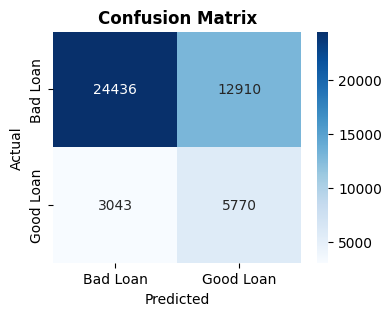

Text(0, 0.5, 'True Positive Rate')

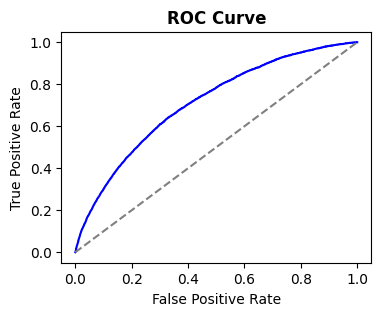

In [117]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad Loan", "Good Loan"], yticklabels=["Bad Loan", "Good Loan"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve', fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')